In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats


C:\Users\win10\anaconda3\jupyter\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Librerías de gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook


In [3]:
pip install --upgrade pandas scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.3/10.6 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.6 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.6 MB 4.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.6 MB 4.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/10.6 MB 4.6 MB/s eta 0:00:02
   ------- ---------

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\win10\\anaconda3\\jupyter\\Lib\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [4]:
!pip install --upgrade scikit-learn

In [5]:
# Cargar los cuatro archivos CSV en cuatro DataFrames diferentes
df1 = pd.read_csv('df_1t_2016.csv')

df5 = pd.read_csv('df_1t_2017.csv')

df9 = pd.read_csv('df_1t_2018.csv')

df13 = pd.read_csv('df_1t_2019.csv')



# Unir los DataFrames en uno solo
# Puedes elegir el método de unión (inner, outer, left, right) según tus necesidades
# En este caso, estoy usando concat para concatenar los DataFrames verticalmente (por filas)
df = pd.concat([df1, df5, df9, df13], axis=0, ignore_index=True)

# Mostrar el DataFrame resultante
print(df)


        gestion  trimestre  id_persona       depto peao  Genero  Edad  \
0          2016          1      212880  Chuquisaca   Si  Hombre    25   
1          2016          1      212881  Chuquisaca   Si   Mujer    22   
2          2016          1      212884  Chuquisaca   Si  Hombre    47   
3          2016          1      212885  Chuquisaca   Si   Mujer    46   
4          2016          1      212886  Chuquisaca   Si  Hombre    27   
...         ...        ...         ...         ...  ...     ...   ...   
114002     2019          1     2406605  Santa Cruz   Si  Hombre    56   
114003     2019          1     2406711  Santa Cruz   Si   Mujer    43   
114004     2019          1     2406712  Santa Cruz   Si  Hombre    23   
114005     2019          1     2406713  Santa Cruz   Si   Mujer    22   
114006     2019          1     2406714  Santa Cruz   Si  Hombre    41   

                         s1_05               Niv_Ed  \
0        JEFE O JEFA DEL HOGAR             Superior   
1       ESPOS

In [6]:
df.dtypes

gestion                int64
trimestre              int64
id_persona             int64
depto                 object
peao                  object
Genero                object
Edad                   int64
s1_05                 object
Niv_Ed                object
Est_Civ               object
Nacionalidad           int64
ocupacion             object
Trabaja               object
Cont_Trab             object
condact               object
phrs                  object
Segundo_Trab          object
Aporta_Hog            object
tiempo_trab_meses     object
ingresos             float64
pagos_extra           object
tasa_desempleo       float64
dtype: object

In [7]:
# Consulta para obtener los valores de tasa de desempleo por gestión
valores_tasa_desempleo = df.groupby('gestion')['tasa_desempleo'].unique()

# Imprimir los valores de tasa de desempleo por gestión
print(valores_tasa_desempleo)


gestion
2016    [5.620336695287016]
2017    [5.074847532803548]
2018    [5.595388218339038]
2019    [5.591252395445834]
Name: tasa_desempleo, dtype: object


In [8]:
# Nuevos valores a reemplazar
nuevos_valores = {
    2016: 5.8,
    2017: 5.65,
    2018: 5.78,
    2019: 6.04
}

# Reemplazar los valores en la columna 'tasa_desempleo'
df['tasa_desempleo'] = df['gestion'].replace(nuevos_valores)

# Imprimir el DataFrame actualizado
print(df)

        gestion  trimestre  id_persona       depto peao  Genero  Edad  \
0          2016          1      212880  Chuquisaca   Si  Hombre    25   
1          2016          1      212881  Chuquisaca   Si   Mujer    22   
2          2016          1      212884  Chuquisaca   Si  Hombre    47   
3          2016          1      212885  Chuquisaca   Si   Mujer    46   
4          2016          1      212886  Chuquisaca   Si  Hombre    27   
...         ...        ...         ...         ...  ...     ...   ...   
114002     2019          1     2406605  Santa Cruz   Si  Hombre    56   
114003     2019          1     2406711  Santa Cruz   Si   Mujer    43   
114004     2019          1     2406712  Santa Cruz   Si  Hombre    23   
114005     2019          1     2406713  Santa Cruz   Si   Mujer    22   
114006     2019          1     2406714  Santa Cruz   Si  Hombre    41   

                         s1_05               Niv_Ed  \
0        JEFE O JEFA DEL HOGAR             Superior   
1       ESPOS

In [9]:
df = df[df['s1_05'] != 'EMPLEADA/O DEL HOGAR CAMA ADENTRO']

In [10]:
valores_s1_05= df['s1_05'].unique()
print(valores_s1_05)

['JEFE O JEFA DEL HOGAR' 'ESPOSA/O O CONVIVIENTE' 'HIJO/A O ENTENADO/A'
 'PADRES' 'YERNO O NUERA' 'HERMANO/A O CUÑADO/A' 'SUEGROS' 'NIETO/NIETA'
 'OTRO PARIENTE' 'OTRO QUE NO ES PARIENTE' 'HERMANO/A O CUï¿½ADO'
 'PARIENTE DE LA EMPLEADA/O DEL HOGAR' 'HERMANO/A O CUï¿½DO']


In [11]:
df['s1_05'] = df['s1_05'].replace(['HERMANO/A O CUÑADO/A', 'HERMANO/A O CUï¿½DO', 'HERMANO/A O CUï¿½ADO', 'HERMANO/A O CUÑDO/A'], 'HERMANO/A O CUÑADO/A')
df['s1_05'] = df['s1_05'].replace(['PARIENTE DE LA EMPLEADA/O DEL HOGAR' ], 'OTRO QUE NO ES PARIENTE')
df['s1_05'] = df['s1_05'].replace(['PADRES', 'SUEGROS'], 'PADRES/SUEGROS')

In [12]:
valores_ocupacion= df['ocupacion'].unique()
print(valores_ocupacion)

['Trabajadores No Calificados' 'Trabajadores de Servicio y Vendedores'
 'Operadores de Instalaciones y Maquinarias' 'Empleados de oficina'
 'Sin ocupacion' 'Profesionales cientificos e intelectuales'
 'Trabajadores de la Construcción, Ind. Manufacturera y Otros'
 'Directivos Adm. Pública y Empresas' 'Técnicos de Nivel Medio'
 'Trabajadores en Agricultura, Pecuaria, Pesca y otros'
 'Otro (Especifique)'
 'Ama de casa/ responsable de los quehaceres del hogar' 'Sin especificar'
 'Fuerzas Armadas' 'Estudiante'
 'Trabajadores de la Construcciï¿½n, Ind. Manufacturera y Otr'
 'Directivos Adm. Pï¿½blica y Empres' 'Tï¿½cnicos de Nivel Med'
 'Trabajadores en Agricultura, Pecuaria,Pesca y otros']


In [13]:
df = df[~df['ocupacion'].isin(['Ama de casa/ responsable de los quehaceres del hogar', 'Estudiante', 'Persona de edad avanzada'])]

In [14]:
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores de la Construcciï¿½n, Ind. Manufacturera y Otr'], 'Trabajadores de la Construcción, Ind. Manufacturera y Otros')
df['ocupacion'] = df['ocupacion'].replace(['Jubilado / Benemï¿½ri'], 'Jubilado / Benemérito')
df['ocupacion'] = df['ocupacion'].replace(['Tï¿½cnicos de Nivel Med'], 'Técnicos de Nivel Medio')
df['ocupacion'] = df['ocupacion'].replace(['Directivos Adm. Pï¿½blica y Empres'], 'Directivos Adm. Pública y Empresas')
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores en Agricultura, Pecuaria, Pesca y otros'], 'Trabajadores en Agricultura, Pecuaria,Pesca y otros')
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores No Calificados', 'Otro (Especifique)','Técnicos de Nivel Medio','Sin especificar'], 'Otro')


In [15]:
valores_Est_civ= df['Est_Civ'].unique()
print(valores_Est_civ)

['CONVIVIENTE O CONCUBINO/A' 'CASADO/A' 'SOLTERO/A' 'SEPARADO/A'
 'DIVORCIADO/A' 'VIUDO/A']


In [16]:
df['Est_Civ'] = df['Est_Civ'].replace(['CONVIVIENTE O CONCUBINO/A'], 'CASADO/A')
df['Est_Civ'] = df['Est_Civ'].replace(['DIVORCIADO/A'], 'SEPARADO/A')

In [17]:
valores_Segundo_Trab= df['Segundo_Trab'].unique()
print(valores_Segundo_Trab)

['No' 'Si' 'Sï']


In [18]:
df['Segundo_Trab'] = df['Segundo_Trab'].replace(['Sï'], 'Si')

In [19]:
valores_Nacionalidad= df['Nacionalidad'].unique()
print(valores_Nacionalidad)

[0 1]


In [20]:
import numpy as np

# Diccionario de mapeo actualizado para incluir 0, 1 y espacio en blanco
nacionalidad_mapping = {'0': 'Boliviano/a', '1': 'Extranjero/a', 0: 'Boliviano/a', 1: 'Extranjero/a', ' ': np.nan}

# Aplicar el mapeo a la columna nacionalidad
df['Nacionalidad'] = df['Nacionalidad'].map(nacionalidad_mapping)

# Eliminar filas donde la nacionalidad es nula
df = df.dropna(subset=['Nacionalidad'])

In [21]:
valores_Nacionalidad= df['Nacionalidad'].unique()
print(valores_Nacionalidad)

['Boliviano/a' 'Extranjero/a']


In [22]:
df['Segundo_Trab'] = df['Segundo_Trab'].replace(['Sï'], 'Si')

In [23]:
valores_Niv_Ed= df['Niv_Ed'].unique()
print(valores_Niv_Ed)

['Superior' 'Secundaria completa' 'Primaria incompleta'
 'Primaria completa' 'Secundaria incompleta' 'Ninguno' 'Sin especificar'
 'Otros' ' ']


In [24]:
df = df[(df['Niv_Ed'].str.strip() != '') & (df['Niv_Ed'] != 'Otros')]

In [25]:
valores_tiempo_trab_meses= df['tiempo_trab_meses'].unique()
print(valores_tiempo_trab_meses)

[484 121 363 ... 163 175 306]


In [26]:
valores_peao= df['peao'].unique()
print(valores_peao)

['Si' 'No']


In [27]:
valores_peao= df['peao'].unique()
print(valores_peao)

['Si' 'No']


In [28]:
df.shape

(113193, 22)

In [29]:
# Convertir 'phrs' a tipo string
df['phrs'] = df['phrs'].astype(str)

# Reemplazar comas por puntos en la columna 'phrs'
df['phrs'] = df['phrs'].str.replace(',', '.')

# Convertir 'phrs' a tipo numérico
df['phrs'] = pd.to_numeric(df['phrs'], errors='coerce')

# Convertir 'ingresos' a tipo string
df['ingresos'] = df['ingresos'].astype(str)

# Reemplazar comas por puntos en la columna 'ingresos'
df['ingresos'] = df['ingresos'].str.replace(',', '.')

# Convertir 'ingresos' a tipo numérico
df['ingresos'] = pd.to_numeric(df['ingresos'], errors='coerce')

# Convertir 'tiempo_trab_meses' a tipo string
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].astype(str)

# Reemplazar comas por puntos en la columna 'tiempo_trab_meses'
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].str.replace(',', '.')

# Convertir 'tiempo_trab_meses' a tipo numérico
df['tiempo_trab_meses'] = pd.to_numeric(df['tiempo_trab_meses'], errors='coerce')

# Imprimir el DataFrame después de las conversiones
print(df)



        gestion  trimestre  id_persona       depto peao  Genero  Edad  \
0          2016          1      212880  Chuquisaca   Si  Hombre    25   
1          2016          1      212881  Chuquisaca   Si   Mujer    22   
2          2016          1      212884  Chuquisaca   Si  Hombre    47   
3          2016          1      212885  Chuquisaca   Si   Mujer    46   
4          2016          1      212886  Chuquisaca   Si  Hombre    27   
...         ...        ...         ...         ...  ...     ...   ...   
114001     2019          1     2406602  Santa Cruz   Si   Mujer    31   
114002     2019          1     2406605  Santa Cruz   Si  Hombre    56   
114004     2019          1     2406712  Santa Cruz   Si  Hombre    23   
114005     2019          1     2406713  Santa Cruz   Si   Mujer    22   
114006     2019          1     2406714  Santa Cruz   Si  Hombre    41   

                         s1_05               Niv_Ed    Est_Civ  ... Trabaja  \
0        JEFE O JEFA DEL HOGAR             S

In [30]:
valores_phrs= df['phrs'].unique()
print(valores_phrs)

valores_tiempo_trab_meses= df['tiempo_trab_meses'].unique()
print(valores_tiempo_trab_meses)

valores_ingresos= df['ingresos'].unique()
print(valores_ingresos)

[ 84.     36.     48.      0.     42.     70.      4.     18.     54.
  50.     30.     25.     60.     24.     20.    112.     40.     55.
  72.     44.     66.     16.     75.     15.     34.     47.5    98.
  90.     78.     63.     56.     45.     49.5    22.     21.     91.
  10.     35.    105.     32.     71.5    28.     12.     27.5    33.
   6.     31.25   14.     66.5    27.     51.     42.5    52.      5.
  65.     26.25   41.25   32.5    27.75    6.25   77.      9.     96.
   8.      2.     16.5    53.75   68.     45.375  20.5    29.     43.5
  39.875  49.     39.     26.     22.5    80.     64.     69.      7.
  31.      3.     13.5    62.5     4.75    8.5    60.5     7.5    23.75
  43.75   38.5    45.5    13.     37.5    57.     59.5    94.5    24.5
 104.    102.    103.25   42.625   8.25   11.25   10.5    24.75   11.
  80.5     4.5    73.5     1.     85.    108.     31.5     5.5    48.75
  46.75   74.75   58.5    88.     30.25   17.5    87.5     8.75   55.25
  71.75   12

In [31]:
df.info

<bound method DataFrame.info of         gestion  trimestre  id_persona       depto peao  Genero  Edad  \
0          2016          1      212880  Chuquisaca   Si  Hombre    25   
1          2016          1      212881  Chuquisaca   Si   Mujer    22   
2          2016          1      212884  Chuquisaca   Si  Hombre    47   
3          2016          1      212885  Chuquisaca   Si   Mujer    46   
4          2016          1      212886  Chuquisaca   Si  Hombre    27   
...         ...        ...         ...         ...  ...     ...   ...   
114001     2019          1     2406602  Santa Cruz   Si   Mujer    31   
114002     2019          1     2406605  Santa Cruz   Si  Hombre    56   
114004     2019          1     2406712  Santa Cruz   Si  Hombre    23   
114005     2019          1     2406713  Santa Cruz   Si   Mujer    22   
114006     2019          1     2406714  Santa Cruz   Si  Hombre    41   

                         s1_05               Niv_Ed    Est_Civ  ... Trabaja  \
0        JEF

In [32]:
# Eliminar filas donde 'ingresos' es inferior a o superior a 15000 (sin incluir el valor 0)
df = df[((df['ingresos'] == 0) | ((df['ingresos'] > 0) & (df['ingresos'] >= 1996) & (df['ingresos'] <= 15000)))]

# Eliminar filas donde el valor es mayor a 300 incluir el valor 0)
df = df[(df['tiempo_trab_meses'].notnull()) & (df['tiempo_trab_meses'] >= 0) & (df['tiempo_trab_meses'] <= 300)]

In [33]:
df.shape

(51015, 22)

In [34]:
# Definir los límites para la categorización de ingresos
ingresos_bins = [-float('inf'), 1, 3000, 7000, float('inf')]
ingresos_labels = ['Sin ingresos', 'Bajo', 'Medio', 'Alto']

# Categorizar ingresos
df['ingresos_categoria'] = pd.cut(df['ingresos'], bins=ingresos_bins, labels=ingresos_labels, right=False)

# Definir los límites para la categorización de tiempo trabajado
tiempo_trab_bins = [-float('inf'), 1, 24, 96, float('inf')]
tiempo_trab_labels = ['Sin experiencia', 'Corto', 'Medio', 'Largo']

# Categorizar tiempo trabajado
df['tiempo_trab_categoria'] = pd.cut(df['tiempo_trab_meses'], bins=tiempo_trab_bins, labels=tiempo_trab_labels, right=False)

# Definir los límites para la categorización de phrs
phrs_bins = [-float('inf'), 0, 40, 50, float('inf')]
phrs_labels = ['Sin horas', 'Parcial', 'Completo', 'Extra']

# Categorizar 'phrs' y crear la nueva columna 'phrs_categoria'
df['phrs_categoria'] = pd.cut(df['phrs'], bins=phrs_bins, labels=phrs_labels, right=False)

# Asignar la categoría 'Sin horas' a las filas donde 'phrs' es nulo
df.loc[df['phrs']== 0, 'phrs_categoria'] = 'Sin horas'

df.head()


,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
1,2016,1,212881,Chuquisaca,Si,Mujer,22,ESPOSA/O O CONVIVIENTE,Secundaria completa,CASADO/A,...,36.0,No,Si,121.0,2400.0,No,5.8,Bajo,Largo,Parcial
4,2016,1,212886,Chuquisaca,Si,Hombre,27,HIJO/A O ENTENADO/A,Superior,SOLTERO/A,...,48.0,No,Si,121.0,2200.0,Si,5.8,Bajo,Largo,Completo
6,2016,1,212895,Chuquisaca,No,Mujer,22,HIJO/A O ENTENADO/A,Superior,SOLTERO/A,...,0.0,No,No,0.0,0.0,No,5.8,Sin ingresos,Sin experiencia,Sin horas
9,2016,1,212917,Chuquisaca,No,Hombre,27,HIJO/A O ENTENADO/A,Superior,SOLTERO/A,...,0.0,No,No,0.0,0.0,No,5.8,Sin ingresos,Sin experiencia,Sin horas
19,2016,1,212943,Chuquisaca,No,Hombre,21,HIJO/A O ENTENADO/A,Secundaria completa,SOLTERO/A,...,0.0,No,No,0.0,0.0,No,5.8,Sin ingresos,Sin experiencia,Sin horas


In [35]:
# Contar el número de casos en cada categoría para 'ingresos_categoria'
conteo_ingresos = df['ingresos_categoria'].value_counts()

# Mostrar los resultados para 'ingresos_categoria'
print("Conteo de casos para 'ingresos_categoria':")
print(conteo_ingresos)
print()

# Contar el número de casos en cada categoría para 'tiempo_trab_categoria'
conteo_tiempo_trab = df['tiempo_trab_categoria'].value_counts()

# Mostrar los resultados para 'tiempo_trab_categoria'
print("Conteo de casos para 'tiempo_trab_categoria':")
print(conteo_tiempo_trab)
print()

# Contar el número de casos en cada categoría para 'phrs_categoria'
conteo_phrs = df['phrs_categoria'].value_counts()

# Mostrar los resultados para 'phrs_categoria'
print("Conteo de casos para 'phrs_categoria':")
print(conteo_phrs)

Conteo de casos para 'ingresos_categoria':
ingresos_categoria
Medio           19568
Sin ingresos    15087
Bajo            13852
Alto             2508
Name: count, dtype: int64

Conteo de casos para 'tiempo_trab_categoria':
tiempo_trab_categoria
Largo              17134
Medio              16756
Corto              11081
Sin experiencia     6044
Name: count, dtype: int64

Conteo de casos para 'phrs_categoria':
phrs_categoria
Completo     20018
Parcial      14297
Extra        10833
Sin horas     5867
Name: count, dtype: int64


In [36]:
valores_ingresos_categoria= df['ingresos_categoria'].unique()
print(valores_ingresos_categoria)

['Bajo', 'Sin ingresos', 'Medio', 'Alto']
Categories (4, object): ['Sin ingresos' < 'Bajo' < 'Medio' < 'Alto']


In [37]:
valores_tiempo_trab_categoria= df['tiempo_trab_categoria'].unique()
print(valores_tiempo_trab_categoria)

['Largo', 'Sin experiencia', 'Corto', 'Medio']
Categories (4, object): ['Sin experiencia' < 'Corto' < 'Medio' < 'Largo']


In [38]:
# Reemplaza los ceros con valores nulos (NaN) en las columnas 
df['phrs'] = df['phrs'].replace(0, pd.NA)

# Reemplaza los ceros con valores nulos (NaN) en las columna ingresos
df['ingresos'] = df['ingresos'].replace(0, pd.NA)

# Reemplaza los ceros con valores nulos (NaN) en las columna tiempo_trab_meses
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].replace(0, pd.NA)


df.head()

,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
1,2016,1,212881,Chuquisaca,Si,Mujer,22,ESPOSA/O O CONVIVIENTE,Secundaria completa,CASADO/A,...,36.0,No,Si,121.0,2400.0,No,5.8,Bajo,Largo,Parcial
4,2016,1,212886,Chuquisaca,Si,Hombre,27,HIJO/A O ENTENADO/A,Superior,SOLTERO/A,...,48.0,No,Si,121.0,2200.0,Si,5.8,Bajo,Largo,Completo
6,2016,1,212895,Chuquisaca,No,Mujer,22,HIJO/A O ENTENADO/A,Superior,SOLTERO/A,...,<NA>,No,No,<NA>,<NA>,No,5.8,Sin ingresos,Sin experiencia,Sin horas
9,2016,1,212917,Chuquisaca,No,Hombre,27,HIJO/A O ENTENADO/A,Superior,SOLTERO/A,...,<NA>,No,No,<NA>,<NA>,No,5.8,Sin ingresos,Sin experiencia,Sin horas
19,2016,1,212943,Chuquisaca,No,Hombre,21,HIJO/A O ENTENADO/A,Secundaria completa,SOLTERO/A,...,<NA>,No,No,<NA>,<NA>,No,5.8,Sin ingresos,Sin experiencia,Sin horas


In [39]:
limite_inferior_ingresos = df['ingresos'].min()
limite_superior_ingresos = df['ingresos'].max()

limite_inferior_tiempo_trab_meses = df['tiempo_trab_meses'].min()
limite_superior_tiempo_trab_meses = df['tiempo_trab_meses'].max()

print("Límite inferior de ingresos:", limite_inferior_ingresos)
print("Límite superior de ingresos:", limite_superior_ingresos)

print("Límite inferior de tiempo_trab_meses:", limite_inferior_tiempo_trab_meses)
print("Límite superior de tiempo_trab_meses:", limite_superior_tiempo_trab_meses)


Límite inferior de ingresos: 1999.0
Límite superior de ingresos: 15000.0
Límite inferior de tiempo_trab_meses: 1.0
Límite superior de tiempo_trab_meses: 300.0


## Tratamiento de valores atipicos por el metodo del rango intercuartil

Tratamiento de valores atípicos  para la columna phrs, ingresos y tiempo_trab_meses

Existen valores atipicos que fueron borrados por el procedimiento

Eliminación por rango intercuartileo

IQR = Q3 - Q1

LI = Q1 - 1.5 * (IQR)

LS = Q3 + 1.5 * (IQR)

In [40]:
df.shape

(51015, 25)

In [41]:
import pandas as pd

# Supongamos que 'phrs' es la columna que quieres convertir y filtrar
columna_a_corregir = 'phrs'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1 = df['phrs'].quantile(q=0.25)
Q3 = df['phrs'].quantile(q=0.75)
IQR = Q3 - Q1

# Filtrar filas basadas en el rango intercuartílico
df_1 = df[~((df['phrs'] < (Q1 - 1.5 * IQR)) | (df['phrs'] > (Q3 + 1.5 * IQR)))].copy()



In [42]:
df_1.shape

(49897, 25)

In [43]:
columna_a_corregir_ingresos = 'tiempo_trab_meses'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1_ingresos = df['tiempo_trab_meses'].quantile(q=0.25)
Q3_ingresos = df['tiempo_trab_meses'].quantile(q=0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos

# Filtrar filas basadas en el rango intercuartílico para 'ingresos'
df_1= df_1[~((df_1['tiempo_trab_meses'] < (Q1_ingresos - 1.5 * IQR_ingresos)) | (df_1['tiempo_trab_meses'] > (Q3_ingresos + 1.5 * IQR_ingresos)))].copy()

In [44]:
df_1.shape

(49364, 25)

In [45]:
columna_a_corregir_ingresos = 'ingresos'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1_ingresos = df['ingresos'].quantile(q=0.25)
Q3_ingresos = df['ingresos'].quantile(q=0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos

# Filtrar filas basadas en el rango intercuartílico para 'ingresos'
df_1= df_1[~((df_1['ingresos'] < (Q1_ingresos - 1.5 * IQR_ingresos)) | (df_1['ingresos'] > (Q3_ingresos + 1.5 * IQR_ingresos)))].copy()

In [46]:
df_1.shape

(47408, 25)

In [47]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47408 entries, 1 to 114005
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                47408 non-null  int64   
 1   trimestre              47408 non-null  int64   
 2   id_persona             47408 non-null  int64   
 3   depto                  47408 non-null  object  
 4   peao                   47408 non-null  object  
 5   Genero                 47408 non-null  object  
 6   Edad                   47408 non-null  int64   
 7   s1_05                  47408 non-null  object  
 8   Niv_Ed                 47408 non-null  object  
 9   Est_Civ                47408 non-null  object  
 10  Nacionalidad           47408 non-null  object  
 11  ocupacion              47408 non-null  object  
 12  Trabaja                47408 non-null  object  
 13  Cont_Trab              47408 non-null  object  
 14  condact                47408 non-null  obj

In [48]:
import numpy as np

# Eliminar registros donde la edad es menor que el tiempo de trabajo en años y el tiempo de trabajo en años no es cero ni nulo
df_1 = df_1[(
    (df_1['Edad'] >= np.where(pd.isna(df_1['tiempo_trab_meses']), np.nan, df_1['tiempo_trab_meses'] / 12)) |
    (df_1['tiempo_trab_meses'].isna())
)]

# Mostrar las primeras filas del DataFrame resultante
df_1.head()



C:\Users\win10\anaconda3\jupyter\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
1,2016,1,212881,Chuquisaca,Si,Mujer,22,ESPOSA/O O CONVIVIENTE,Secundaria completa,CASADO/A,...,36.0,No,Si,121.0,2400.0,No,5.8,Bajo,Largo,Parcial
4,2016,1,212886,Chuquisaca,Si,Hombre,27,HIJO/A O ENTENADO/A,Superior,SOLTERO/A,...,48.0,No,Si,121.0,2200.0,Si,5.8,Bajo,Largo,Completo
6,2016,1,212895,Chuquisaca,No,Mujer,22,HIJO/A O ENTENADO/A,Superior,SOLTERO/A,...,<NA>,No,No,<NA>,<NA>,No,5.8,Sin ingresos,Sin experiencia,Sin horas
9,2016,1,212917,Chuquisaca,No,Hombre,27,HIJO/A O ENTENADO/A,Superior,SOLTERO/A,...,<NA>,No,No,<NA>,<NA>,No,5.8,Sin ingresos,Sin experiencia,Sin horas
19,2016,1,212943,Chuquisaca,No,Hombre,21,HIJO/A O ENTENADO/A,Secundaria completa,SOLTERO/A,...,<NA>,No,No,<NA>,<NA>,No,5.8,Sin ingresos,Sin experiencia,Sin horas


In [49]:
df_1['peao'].value_counts()

peao
Si    41091
No     5862
Name: count, dtype: int64

In [50]:
df_1.shape

(46953, 25)

In [51]:
# Convertir 'phrs' a tipo string
df_1['phrs'] = df_1['phrs'].astype(str)

# Reemplazar comas por puntos en la columna 'phrs'
df_1['phrs'] = df_1['phrs'].str.replace(',', '.')

# Convertir 'phrs' a tipo numérico
df_1['phrs'] = pd.to_numeric(df_1['phrs'], errors='coerce')

# Convertir 'ingresos' a tipo string
df_1['ingresos'] = df_1['ingresos'].astype(str)

# Reemplazar comas por puntos en la columna 'ingresos'
df_1['ingresos'] = df_1['ingresos'].str.replace(',', '.')

# Convertir 'ingresos' a tipo numérico
df_1['ingresos'] = pd.to_numeric(df_1['ingresos'], errors='coerce')

# Convertir 'tiempo_trab_meses' a tipo string
df_1['tiempo_trab_meses'] = df_1['tiempo_trab_meses'].astype(str)

# Reemplazar comas por puntos en la columna 'tiempo_trab_meses'
df_1['tiempo_trab_meses'] = df_1['tiempo_trab_meses'].str.replace(',', '.')

# Convertir 'tiempo_trab_meses' a tipo numérico
df_1['tiempo_trab_meses'] = pd.to_numeric(df_1['tiempo_trab_meses'], errors='coerce')

# Imprimir el DataFrame después de las conversiones
print(df_1)


        gestion  trimestre  id_persona       depto peao  Genero  Edad  \
1          2016          1      212881  Chuquisaca   Si   Mujer    22   
4          2016          1      212886  Chuquisaca   Si  Hombre    27   
6          2016          1      212895  Chuquisaca   No   Mujer    22   
9          2016          1      212917  Chuquisaca   No  Hombre    27   
19         2016          1      212943  Chuquisaca   No  Hombre    21   
...         ...        ...         ...         ...  ...     ...   ...   
113999     2019          1     2406600  Santa Cruz   Si  Hombre    28   
114000     2019          1     2406601  Santa Cruz   Si  Hombre    33   
114002     2019          1     2406605  Santa Cruz   Si  Hombre    56   
114004     2019          1     2406712  Santa Cruz   Si  Hombre    23   
114005     2019          1     2406713  Santa Cruz   Si   Mujer    22   

                         s1_05               Niv_Ed    Est_Civ  ...  phrs  \
1       ESPOSA/O O CONVIVIENTE  Secundaria com

In [52]:
# Eliminar filas donde 'tiempo_trab_meses' está vacío pero 'phrs' tiene contenido
df_1 = df_1[~(df_1['tiempo_trab_meses'].isna() & df_1['phrs'].notna())]

In [53]:
df_1.shape

(46790, 25)

In [54]:
# Eliminar filas donde 'tiempo_trab_meses' está vacío pero 'phrs' tiene contenido
df_1 = df_1[~(df_1['tiempo_trab_meses'].notna() &df_1['tiempo_trab_meses'].notna() & df_1['phrs'].isna())]

In [55]:
df_1.shape

(46789, 25)

In [56]:
# Filtrar las filas
df_1 = df_1[~((df_1['ingresos'].isna()) & 
             (df_1['tiempo_trab_categoria'].isin(['Largo','Medio', 'Corto'])))]

In [57]:
# Filtrar las filas
df_1 = df_1[~((df_1['ingresos'].isna()) & 
             (df_1['phrs_categoria'].isin(['Completo', 'Extra', 'Parcial'])))]

In [58]:
# Guardar el DataFrame en un archivo CSV
df_1.to_csv('df_1t.csv', index=False)
 # El parámetro index=False evita que se escriba el índice en el archivo.

In [59]:
df_1.shape

(38165, 25)

# Analisis descriptivo
Variables numéricas
  

In [60]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,38165.000000,38165.0,3.816500e+04,38165.000000,32299.000000,32299.000000,32299.000000,38165.000000
mean,2017.937508,1.0,1.616189e+06,35.955011,43.838675,81.285200,3365.685462,5.855218
std,1.013223,0.0,6.844402e+05,11.963141,13.682560,77.330249,1192.396344,0.142287
min,2016.000000,1.0,2.128810e+05,14.000000,2.000000,1.000000,1999.000000,5.650000
25%,2017.000000,1.0,1.056761e+06,27.000000,40.000000,18.000000,2400.000000,5.780000
50%,2018.000000,1.0,1.684476e+06,34.000000,45.000000,60.000000,3000.000000,5.780000
75%,2019.000000,1.0,2.288494e+06,44.000000,49.500000,121.000000,4000.000000,6.040000
max,2019.000000,1.0,2.406605e+06,95.000000,77.000000,264.090000,7260.000000,6.040000


In [61]:
# Crea una lista de las variables numéricas
variables_numericas = ['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs', 'tasa_desempleo']

# Crea un DataFrame vacío para almacenar las estadísticas descriptivas
df_estadisticas = pd.DataFrame(columns=['Variable', 'Moda', 'Mediana', 'Media', 'Desviación estándar', 'Varianza', 'Coeficiente de variabilidad'])

# Calcula las estadísticas descriptivas para cada variable
for variable in variables_numericas:
    # Calcula la moda
    moda = df_1[variable].mode().iloc[0]

    # Calcula la mediana
    mediana = df_1[variable].median()

    # Calcula la media
    media = df_1[variable].mean()

    # Calcula la desviación estándar
    desviacion_estandar = df_1[variable].std()

    # Calcula la varianza
    varianza = desviacion_estandar**2

    # Calcula el coeficiente de variabilidad
    coef_variabilidad = (desviacion_estandar / media) * 100

    # Agrega las estadísticas a la tabla
    df_estadisticas = pd.concat([df_estadisticas, pd.DataFrame({
        'Variable': [variable],
        'Moda': [moda],
        'Mediana': [mediana],
        'Media': [media],
        'Desviación estándar': [desviacion_estandar],
        'Varianza': [varianza],
        'Coeficiente de variabilidad': [coef_variabilidad]
    })], ignore_index=True)

# Imprime la tabla
print(df_estadisticas.to_string(index=False))


         Variable    Moda  Mediana       Media  Desviación estándar     Varianza  Coeficiente de variabilidad
             Edad      28    34.00   35.955011            11.963141 1.431168e+02                    33.272529
tiempo_trab_meses   242.0    60.00   81.285200            77.330249 5.979967e+03                    95.134475
         ingresos  3000.0  3000.00 3365.685462          1192.396344 1.421809e+06                    35.428039
             phrs    48.0    45.00   43.838675            13.682560 1.872125e+02                    31.211163
   tasa_desempleo    5.78     5.78    5.855218             0.142287 2.024557e-02                     2.430087


C:\Users\win10\AppData\Local\Temp\ipykernel_18372\1069559067.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_estadisticas = pd.concat([df_estadisticas, pd.DataFrame({


<IPython.core.display.Javascript object>


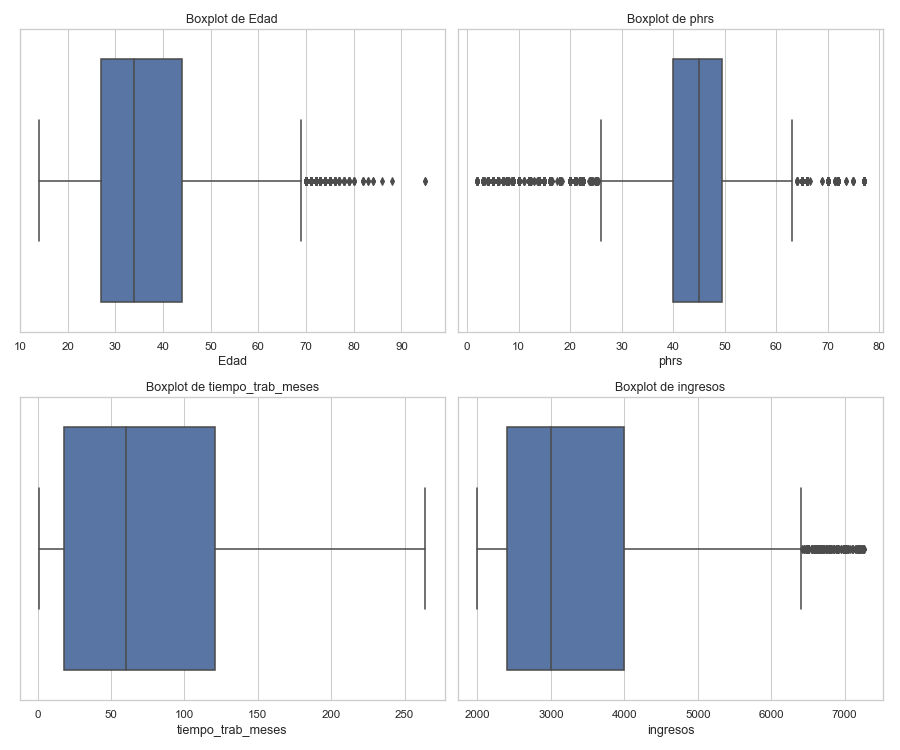

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Variables a incluir en los boxplots
variables_boxplot = ['Edad', 'phrs', 'tiempo_trab_meses', 'ingresos']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterar sobre las variables y dibujar boxplots
for i, variable in enumerate(variables_boxplot):
    sns.boxplot(x=df_1[variable], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {variable}')

# Ajustes de diseño
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


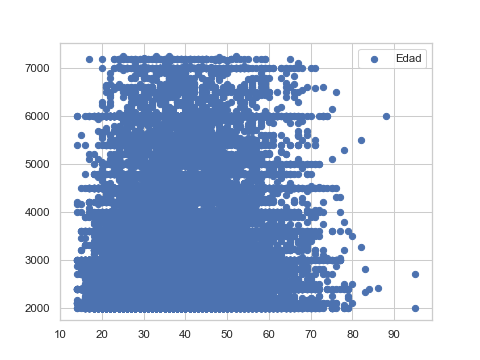

0.14374259543258347


In [63]:
# Crea un gráfico de dispersión
plt.figure()
plt.scatter(df_1['Edad'], df_1['ingresos'])

# Agrega una leyenda
plt.legend(['Edad', 'Ingresos'])

# Muestra el gráfico
plt.show()

# Copia el DataFrame para preservar el original
df_1_copia = df_1.copy()

# Elimina las filas con valores nulos en las columnas 'Edad' e 'Ingresos'
df_1_sin_nulos = df_1_copia.dropna(subset=['Edad', 'ingresos'])

# Calcula la correlación lineal
correlacion = np.corrcoef(df_1_sin_nulos['Edad'], df_1_sin_nulos['ingresos'])[0, 1]
print(correlacion)



<IPython.core.display.Javascript object>


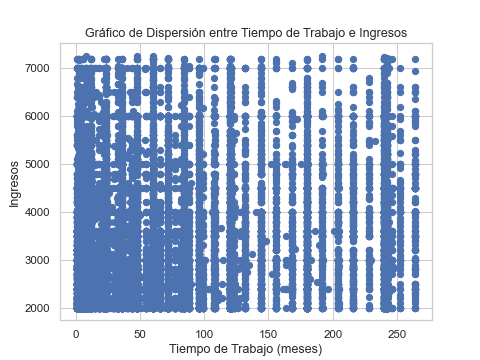

Correlación entre Tiempo de Trabajo e Ingresos: 0.12155941680554172


In [64]:
plt.figure()
plt.scatter(df_1_sin_nulos['tiempo_trab_meses'], df_1_sin_nulos['ingresos'])
plt.xlabel('Tiempo de Trabajo (meses)')
plt.ylabel('Ingresos')
plt.title('Gráfico de Dispersión entre Tiempo de Trabajo e Ingresos')
plt.show()

correlacion_tt_ingresos = np.corrcoef(df_1_sin_nulos['tiempo_trab_meses'], df_1_sin_nulos['ingresos'])[0, 1]
print("Correlación entre Tiempo de Trabajo e Ingresos:", correlacion_tt_ingresos)


<IPython.core.display.Javascript object>


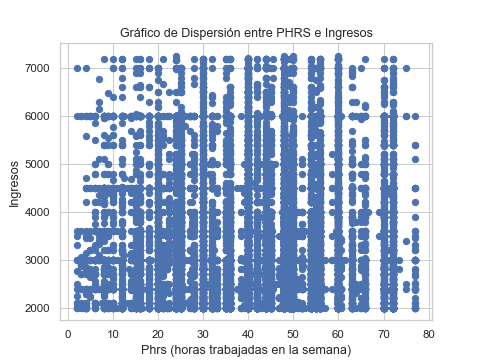

Correlación entre PHRS e Ingresos: -0.005600949744460322


In [65]:
plt.figure()
plt.scatter(df_1_sin_nulos['phrs'], df_1_sin_nulos['ingresos'])
plt.xlabel('Phrs (horas trabajadas en la semana)')
plt.ylabel('Ingresos')
plt.title('Gráfico de Dispersión entre PHRS e Ingresos')
plt.show()

correlacion_phrs_ingresos = np.corrcoef(df_1_sin_nulos['phrs'], df_1_sin_nulos['ingresos'])[0, 1]
print("Correlación entre PHRS e Ingresos:", correlacion_phrs_ingresos)


In [66]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,38165.000000,38165.0,3.816500e+04,38165.000000,32299.000000,32299.000000,32299.000000,38165.000000
mean,2017.937508,1.0,1.616189e+06,35.955011,43.838675,81.285200,3365.685462,5.855218
std,1.013223,0.0,6.844402e+05,11.963141,13.682560,77.330249,1192.396344,0.142287
min,2016.000000,1.0,2.128810e+05,14.000000,2.000000,1.000000,1999.000000,5.650000
25%,2017.000000,1.0,1.056761e+06,27.000000,40.000000,18.000000,2400.000000,5.780000
50%,2018.000000,1.0,1.684476e+06,34.000000,45.000000,60.000000,3000.000000,5.780000
75%,2019.000000,1.0,2.288494e+06,44.000000,49.500000,121.000000,4000.000000,6.040000
max,2019.000000,1.0,2.406605e+06,95.000000,77.000000,264.090000,7260.000000,6.040000


<IPython.core.display.Javascript object>


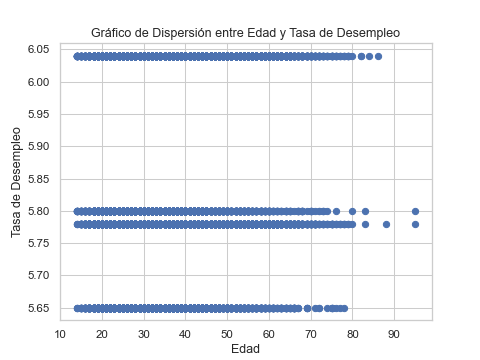

Correlación entre Edad y Tasa de Desempleo: 0.08237444759949099


In [67]:
plt.figure()
plt.scatter(df_1_sin_nulos['Edad'], df_1_sin_nulos['tasa_desempleo'])
plt.xlabel('Edad')
plt.ylabel('Tasa de Desempleo')
plt.title('Gráfico de Dispersión entre Edad y Tasa de Desempleo')
plt.show()

correlacion_edad_tasa_desempleo = np.corrcoef(df_1_sin_nulos['Edad'], df_1_sin_nulos['tasa_desempleo'])[0, 1]
print("Correlación entre Edad y Tasa de Desempleo:", correlacion_edad_tasa_desempleo)


<IPython.core.display.Javascript object>


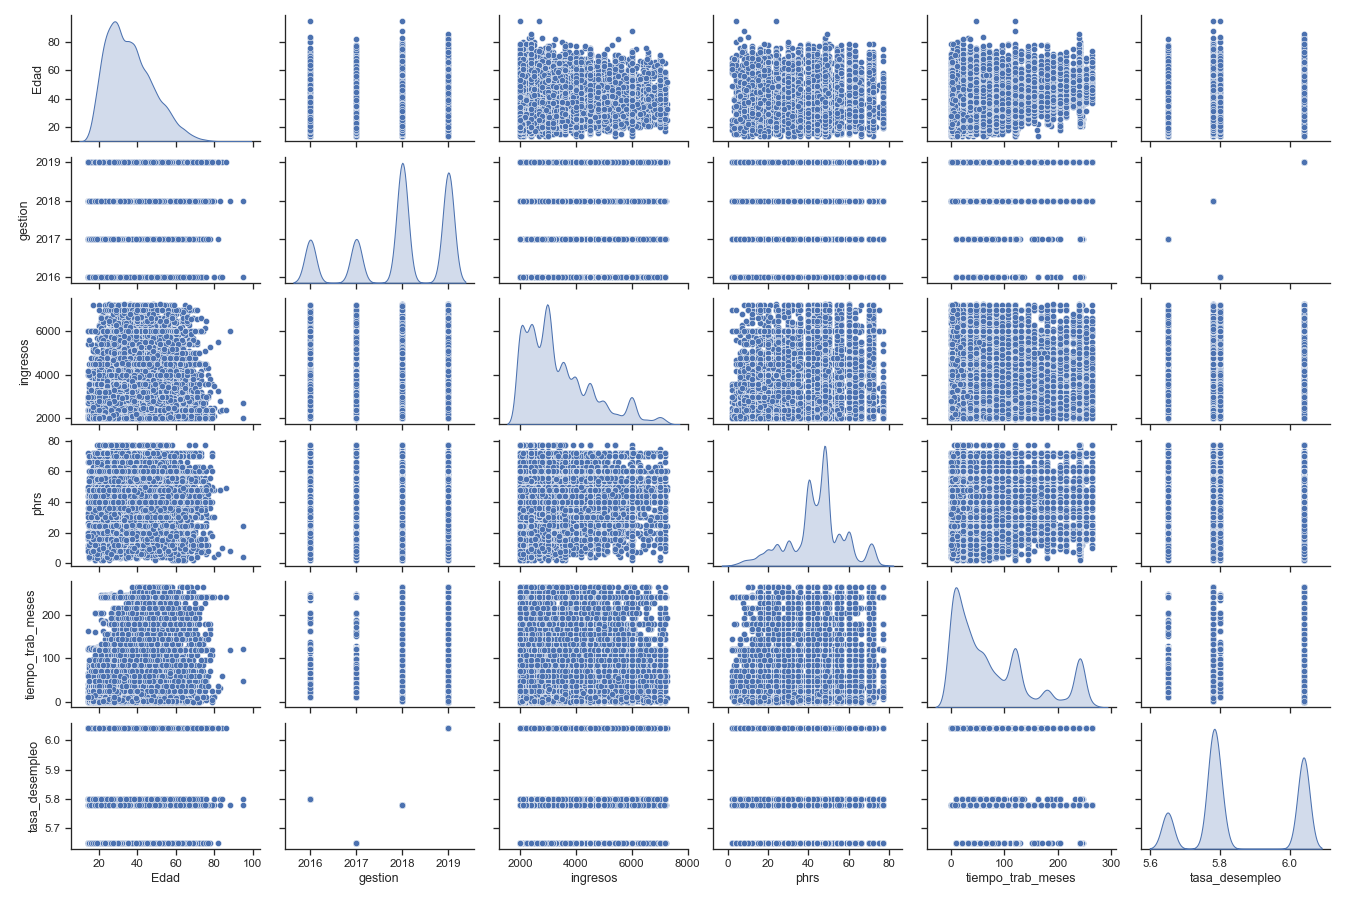

C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas relevantes del DataFrame
columns_to_plot = ['Edad', 'gestion', 'ingresos', 'phrs','tiempo_trab_meses', 'tasa_desempleo']
data_to_plot = df_1[columns_to_plot]

# Configuración de tamaño y diseño
sns.set(style="ticks")
sns.pairplot(data_to_plot, height=2, aspect=1.5, diag_kind='kde')

plt.show()


<IPython.core.display.Javascript object>


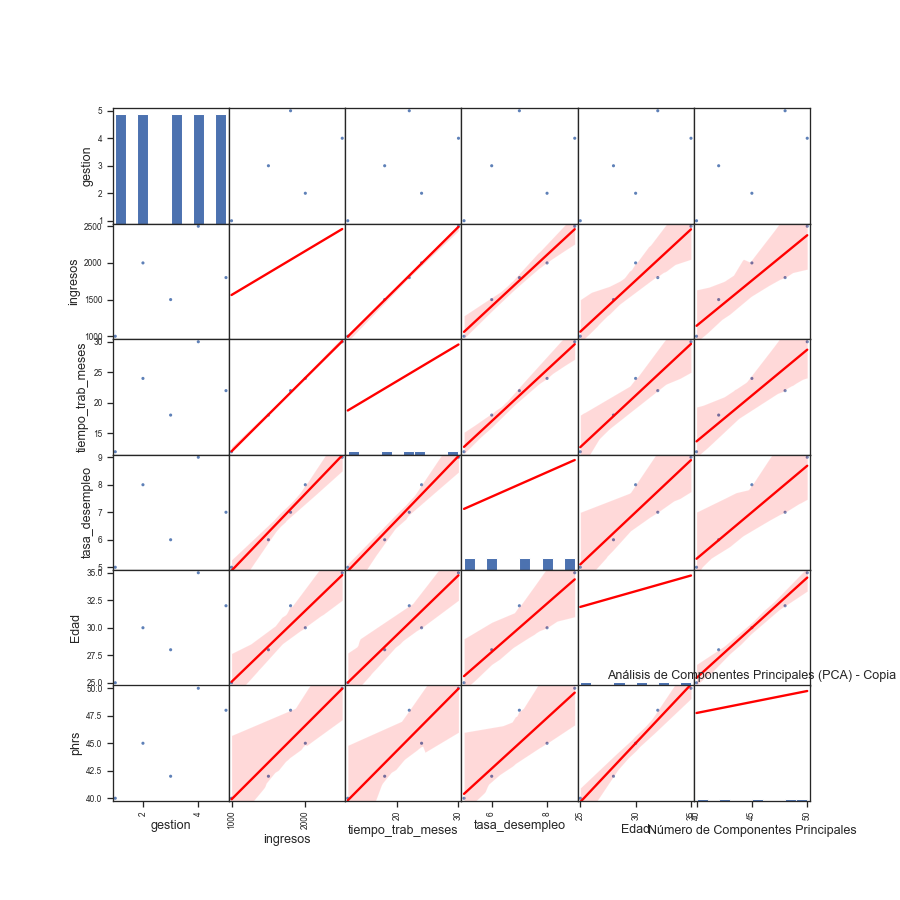

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {'gestion': [1, 2, 3, 4, 5],
        'ingresos': [1000, 2000, 1500, 2500, 1800],
        'tiempo_trab_meses': [12, 24, 18, 30, 22],
        'tasa_desempleo': [5, 8, 6, 9, 7],
        'Edad': [25, 30, 28, 35, 32],
        'phrs': [40, 45, 42, 50, 48]} 

# Crear una copia del DataFrame original
df_copia = pd.DataFrame(data).copy(deep=True)

# Crear un gráfico de dispersión con líneas de tendencia
scatter_matrix = pd.plotting.scatter_matrix(df_copia, alpha=0.9, figsize=(12, 12))

# Agregar líneas de tendencia utilizando Seaborn
for i, ax_i in enumerate(scatter_matrix):
    for j, ax_j in enumerate(ax_i):
        # Obtener el nombre de las columnas en los ejes x e y
        x_col = df_copia.columns[j]
        y_col = df_copia.columns[i]
        
        # Agregar línea de tendencia solo si las columnas en los ejes x e y son diferentes de 'gestion'
        if x_col != 'gestion' and y_col != 'gestion':
            sns.regplot(x=x_col, y=y_col, data=df_copia, scatter=False, ax=ax_j, color='red')

plt.show()



In [70]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,38165.000000,38165.0,3.816500e+04,38165.000000,32299.000000,32299.000000,32299.000000,38165.000000
mean,2017.937508,1.0,1.616189e+06,35.955011,43.838675,81.285200,3365.685462,5.855218
std,1.013223,0.0,6.844402e+05,11.963141,13.682560,77.330249,1192.396344,0.142287
min,2016.000000,1.0,2.128810e+05,14.000000,2.000000,1.000000,1999.000000,5.650000
25%,2017.000000,1.0,1.056761e+06,27.000000,40.000000,18.000000,2400.000000,5.780000
50%,2018.000000,1.0,1.684476e+06,34.000000,45.000000,60.000000,3000.000000,5.780000
75%,2019.000000,1.0,2.288494e+06,44.000000,49.500000,121.000000,4000.000000,6.040000
max,2019.000000,1.0,2.406605e+06,95.000000,77.000000,264.090000,7260.000000,6.040000


## Analisis de Componentes principales (PCA)

In [71]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original
df_1_copy = df_1.copy()

# Seleccionar solo las variables numéricas en la copia
numeric_variables_copy = df_1_copy[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]

# Eliminar filas que contienen valores nulos en las columnas seleccionadas en la copia
numeric_variables_copy = numeric_variables_copy.dropna()

# Estandarizar las variables para que tengan media 0 y desviación estándar 1 (importante para PCA)
scaler = StandardScaler()
numeric_variables_standardized_copy = scaler.fit_transform(numeric_variables_copy)

# Crear un objeto PCA en la copia
pca_copy = PCA()

# Aplicar PCA a las variables estandarizadas en la copia
principal_components_copy = pca_copy.fit_transform(numeric_variables_standardized_copy)

# Obtener las proporciones de varianza explicada por cada componente principal en la copia
explained_variance_ratio_copy = pca_copy.explained_variance_ratio_

# Graficar la varianza explicada acumulativa en la copia
cumulative_explained_variance_copy = explained_variance_ratio_copy.cumsum()
plt.plot(range(1, len(cumulative_explained_variance_copy) + 1), cumulative_explained_variance_copy, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Análisis de Componentes Principales (PCA) - Copia')
plt.show()


<IPython.core.display.Javascript object>


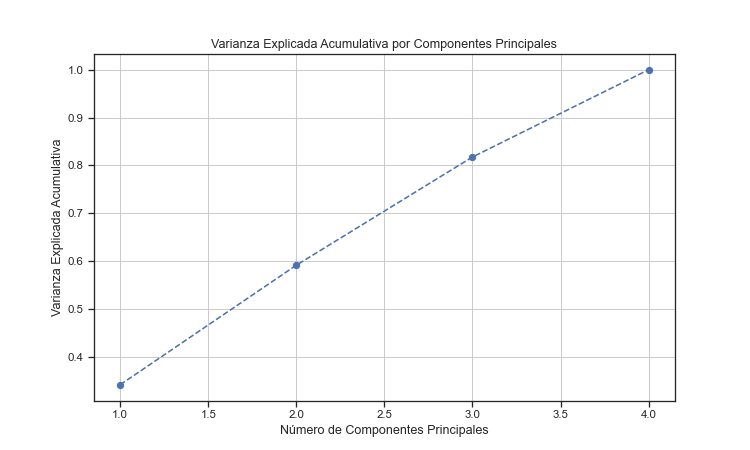

Proporción de Varianza Explicada por Componente Principal:
Componente Principal 1: 0.3419
Componente Principal 2: 0.2497
Componente Principal 3: 0.2261
Componente Principal 4: 0.1823


In [72]:
from sklearn.decomposition import PCA

# Crear un objeto PCA
pca = PCA()

# Aplicar PCA a las variables estandarizadas
pca_result = pca.fit_transform(numeric_variables_standardized_copy)

# Visualizar la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por Componentes Principales')
plt.grid(True)
plt.show()

# Imprimir las proporciones de varianza explicada por cada componente principal
print("Proporción de Varianza Explicada por Componente Principal:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Componente Principal {i}: {ratio:.4f}")


In [74]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Obtén los pesos (cargas) de las variables originales en cada componente principal
component_weights = pca_copy.components_

# Crea un DataFrame para mostrar los pesos
weights_df = pd.DataFrame(component_weights, columns=numeric_variables_copy.columns)

# Visualiza los pesos para cada componente principal
for i in range(len(weights_df)):
    print(f"\nComponente Principal {i+1}:\n{weights_df.iloc[i]}")




Componente Principal 1:
Edad                 0.636281
tiempo_trab_meses    0.619187
ingresos             0.454726
phrs                -0.070551
Name: 0, dtype: float64

Componente Principal 2:
Edad                -0.004894
tiempo_trab_meses   -0.039152
ingresos            -0.094180
phrs                -0.994773
Name: 1, dtype: float64

Componente Principal 3:
Edad                -0.265642
tiempo_trab_meses   -0.382652
ingresos             0.882327
phrs                -0.067167
Name: 2, dtype: float64

Componente Principal 4:
Edad                 0.724263
tiempo_trab_meses   -0.684582
ingresos            -0.076508
phrs                 0.030623
Name: 3, dtype: float64


## Modelo de Regresion de minimos cuadrados ordinarios OLS

In [75]:
import pandas as pd
import statsmodels.api as sm

# Importa tus datos
df_regresion = df_1

df_regresion = df_regresion.dropna(subset=["ingresos", "tiempo_trab_meses", "phrs", "tasa_desempleo"])

# Selecciona las variables independientes y la variable dependiente
X = df_regresion[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]
y = df_regresion["tasa_desempleo"]

# Crea el modelo de regresión
X = sm.add_constant(X)  # Agrega una constante al modelo
model = sm.OLS(y, X).fit()

# Imprime el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         tasa_desempleo   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     514.2
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:49:38   Log-Likelihood:                 18224.
No. Observations:               32299   AIC:                        -3.644e+04
Df Residuals:                   32294   BIC:                        -3.640e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.8265      0.00

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Obtén las predicciones del modelo
y_pred = model.predict(X)

# Calcular métricas de regresión
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14


## Factor de inflacion de la varianza y Tolerancia

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprime los resultados del VIF
print("Factor de Inflación de la Varianza (VIF):")
print(vif_data)


Factor de Inflación de la Varianza (VIF):
            Variable        VIF
0              const  27.251342
1               Edad   1.093455
2  tiempo_trab_meses   1.086479
3           ingresos   1.028874
4               phrs   1.000633


In [78]:
# Calcula la tolerancia para cada variable independiente
tolerance = 1 / vif_data["VIF"]

# Agrega la tolerancia al DataFrame
vif_data["Tolerance"] = tolerance

# Imprime los resultados de la tolerancia
print("Tolerancia:")
print(vif_data)


Tolerancia:
            Variable        VIF  Tolerance
0              const  27.251342   0.036695
1               Edad   1.093455   0.914533
2  tiempo_trab_meses   1.086479   0.920405
3           ingresos   1.028874   0.971936
4               phrs   1.000633   0.999368


In [79]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## Matriz de correlación de Pearson

<IPython.core.display.Javascript object>


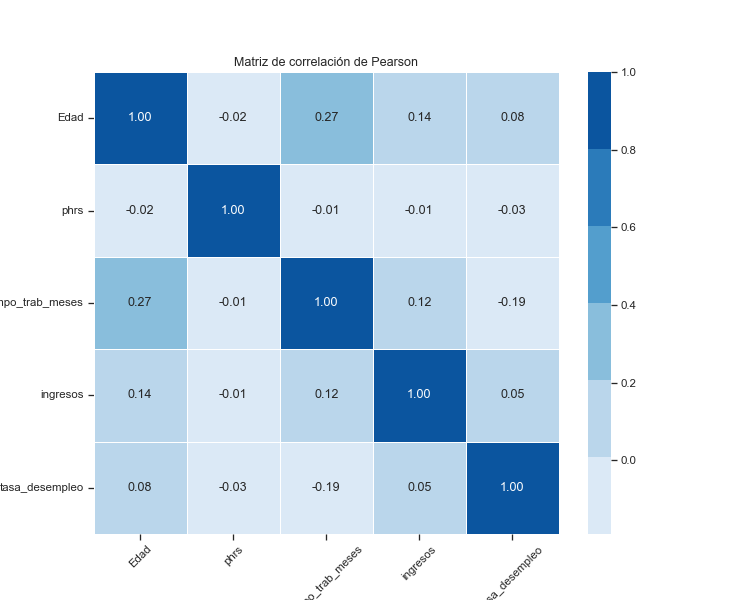

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona las variables numéricas para el análisis de correlación
variables_numericas = ['Edad','phrs', 'tiempo_trab_meses', 'ingresos', 'tasa_desempleo']

# Crea una subconjunto del DataFrame solo con las variables seleccionadas
df_1_numericas = df_1[variables_numericas]

# Calcula la matriz de correlación de Pearson
matriz_correlacion = df_1_numericas.corr()

# Configuración de colores
colores = sns.color_palette("Blues")

# Crea el gráfico de mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap=colores, fmt=".2f", linewidths=.5)

# Agrega un título al gráfico
plt.title("Matriz de correlación de Pearson")

# Ajusta las etiquetas de los ejes
plt.xticks(np.arange(0.5, len(variables_numericas) + 0.5), variables_numericas, rotation=45)
plt.yticks(np.arange(0.5, len(variables_numericas) + 0.5), variables_numericas, rotation=0)

# Muestra el gráfico
plt.show()



In [81]:
%matplotlib inline

# Descriptivos para Variables Categóricas:

In [82]:
df_1.describe(include='object')

,depto,peao,Genero,s1_05,Niv_Ed,Est_Civ,Nacionalidad,ocupacion,Trabaja,Cont_Trab,condact,Segundo_Trab,Aporta_Hog,pagos_extra
count,38165,38165,38165,38165,38165,38165,38165,38165,38165,38165,38165,38165,38165,38165
unique,9,2,2,9,6,4,2,10,2,2,3,2,2,2
top,La Paz,Si,Hombre,JEFE O JEFA DEL HOGAR,Superior,CASADO/A,Boliviano/a,"Trabajadores de la Construcción, Ind. Manufact...",Si,Si,Ocupado,No,Si,No
freq,8228,32303,25135,21051,16125,24527,38061,8659,31387,31550,32303,35486,31230,22469


In [83]:
df_1['peao'].value_counts()

peao
Si    32303
No     5862
Name: count, dtype: int64

In [84]:
import pandas as pd

# Supongamos que estas son las variables en tu DataFrame
variables_categoricas = ['depto', 'peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion',
                          'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

# Calcular la frecuencia para cada variable categórica
for variable in variables_categoricas:
    frecuencia_variable = df_1[variable].value_counts()
    print(f"Frecuencia para {variable}:")
    print(frecuencia_variable)
    print()

# Calcular el porcentaje para cada variable categórica
for variable in variables_categoricas:
    porcentaje_variable = df_1[variable].value_counts(normalize=True) * 100
    print(f"Porcentaje para {variable}:")
    print(porcentaje_variable)
    print()


Frecuencia para depto:
depto
La Paz        8228
Santa Cruz    7644
Cochabamba    6716
Potosi        3303
Chuquisaca    3060
Pando         2582
Beni          2564
Tarija        2077
Oruro         1991
Name: count, dtype: int64

Frecuencia para peao:
peao
Si    32303
No     5862
Name: count, dtype: int64

Frecuencia para Genero:
Genero
Hombre    25135
Mujer     13030
Name: count, dtype: int64

Frecuencia para s1_05:
s1_05
JEFE O JEFA DEL HOGAR      21051
HIJO/A O ENTENADO/A         8454
ESPOSA/O O CONVIVIENTE      7049
YERNO O NUERA                559
HERMANO/A O CUÑADO/A         531
NIETO/NIETA                  236
OTRO PARIENTE                172
PADRES/SUEGROS                72
OTRO QUE NO ES PARIENTE       41
Name: count, dtype: int64

Frecuencia para Niv_Ed:
Niv_Ed
Superior                 16125
Secundaria completa       7738
Secundaria incompleta     6416
Primaria incompleta       4895
Primaria completa         2718
Ninguno                    273
Name: count, dtype: int64

Frecuenc

<IPython.core.display.Javascript object>


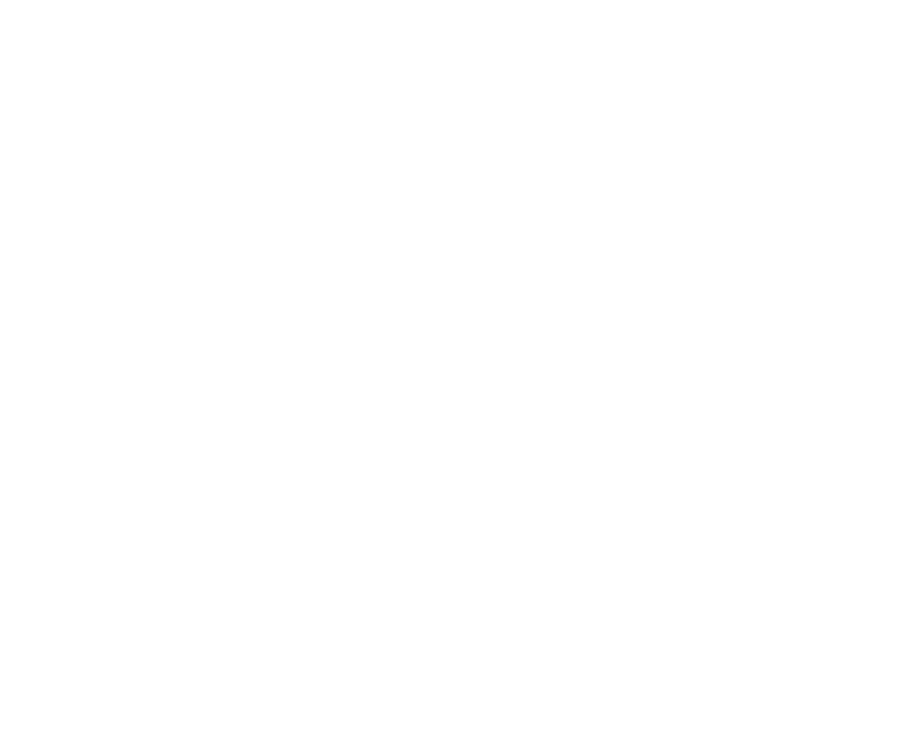

<IPython.core.display.Javascript object>


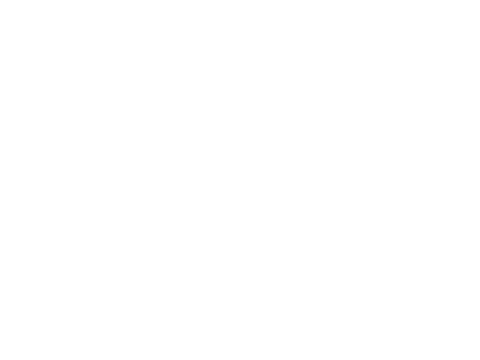

<IPython.core.display.Javascript object>


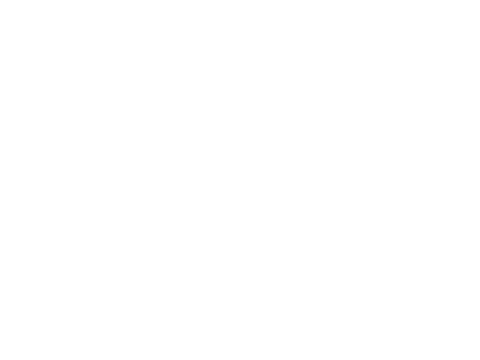

<IPython.core.display.Javascript object>


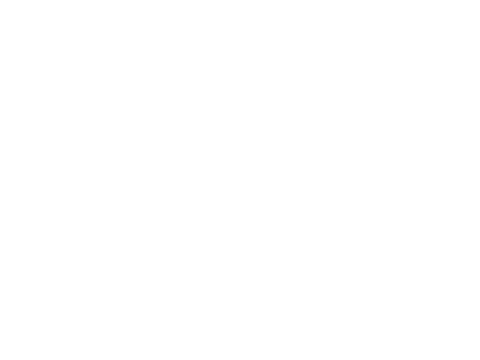

<IPython.core.display.Javascript object>


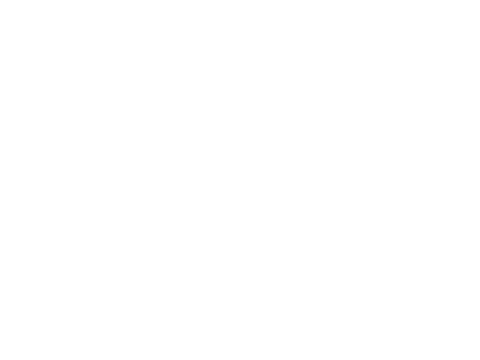

<IPython.core.display.Javascript object>


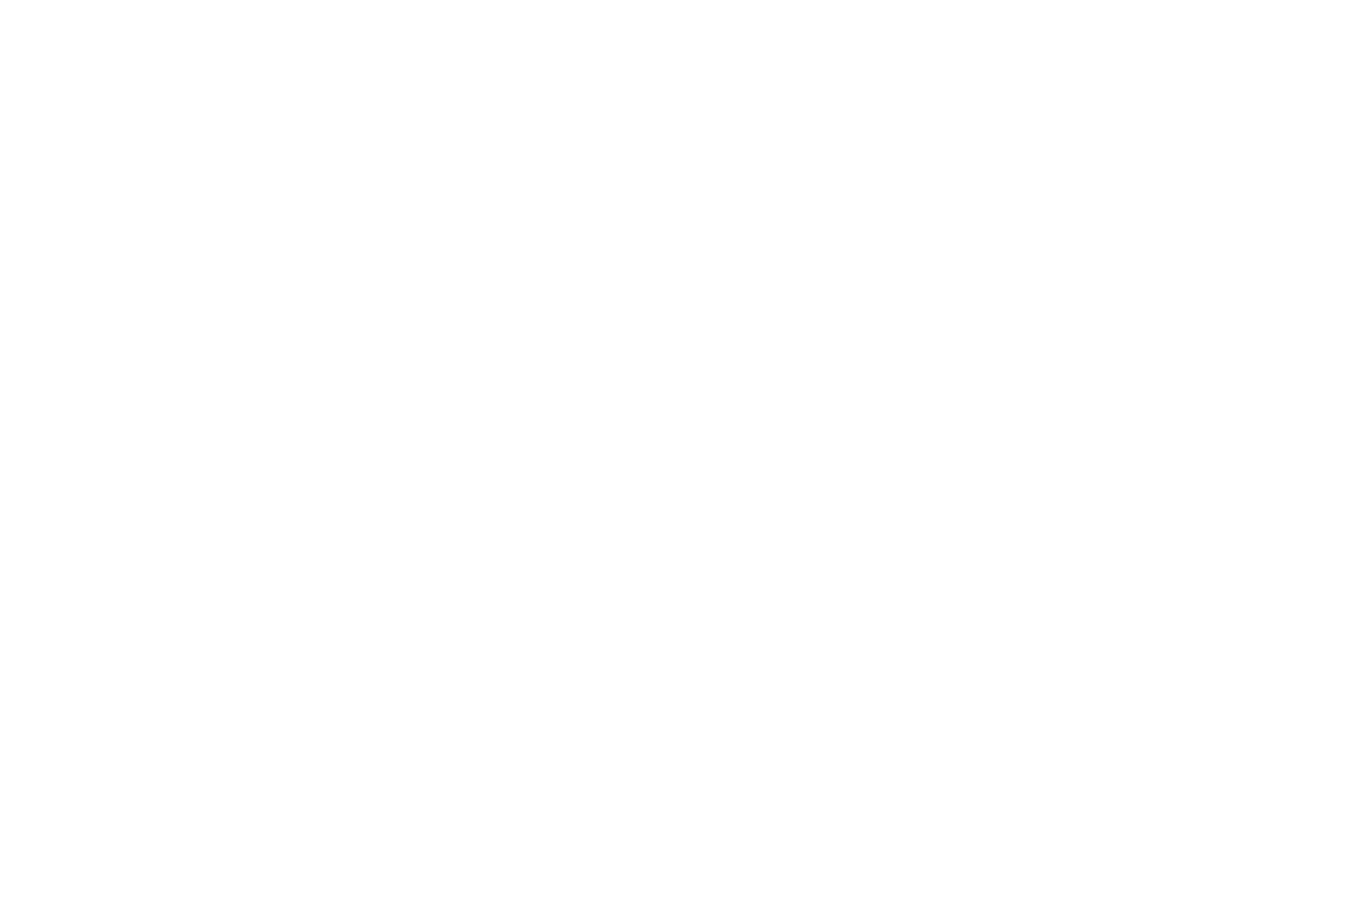

<IPython.core.display.Javascript object>


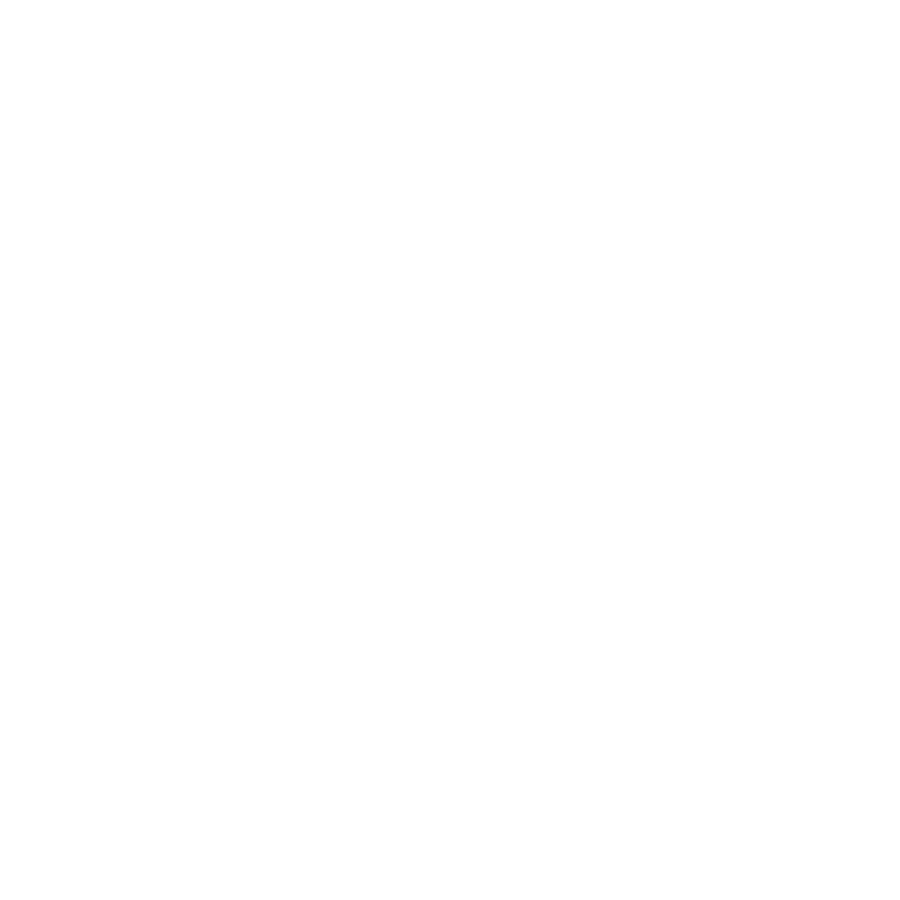

<IPython.core.display.Javascript object>


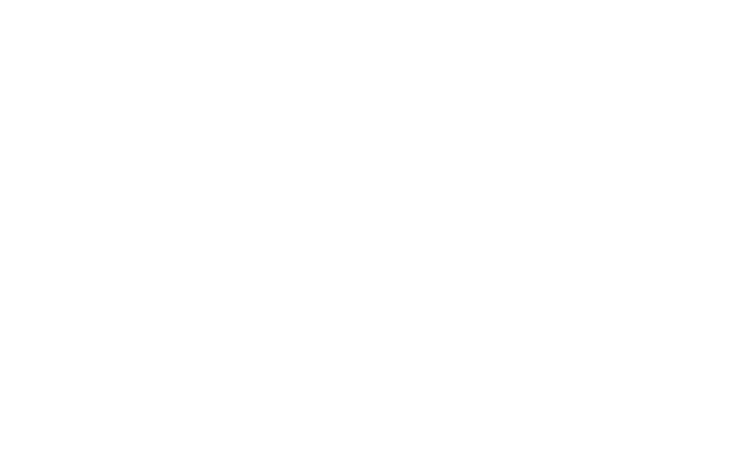

<IPython.core.display.Javascript object>


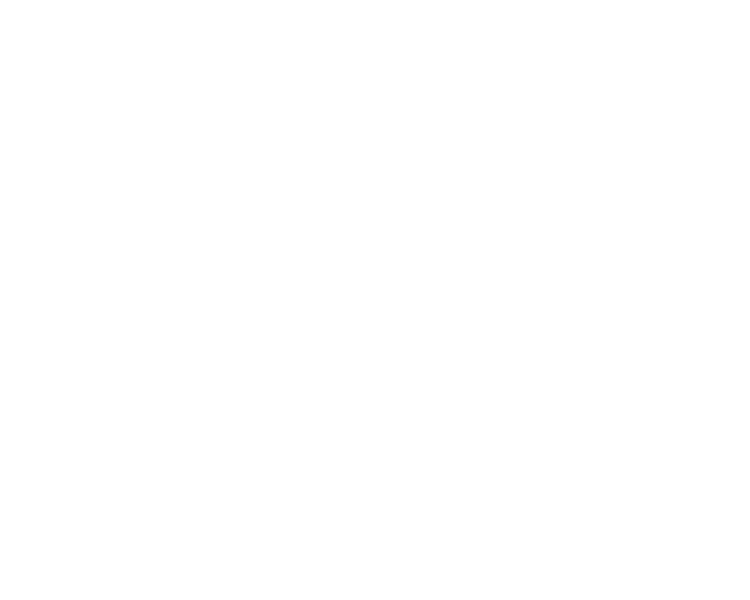

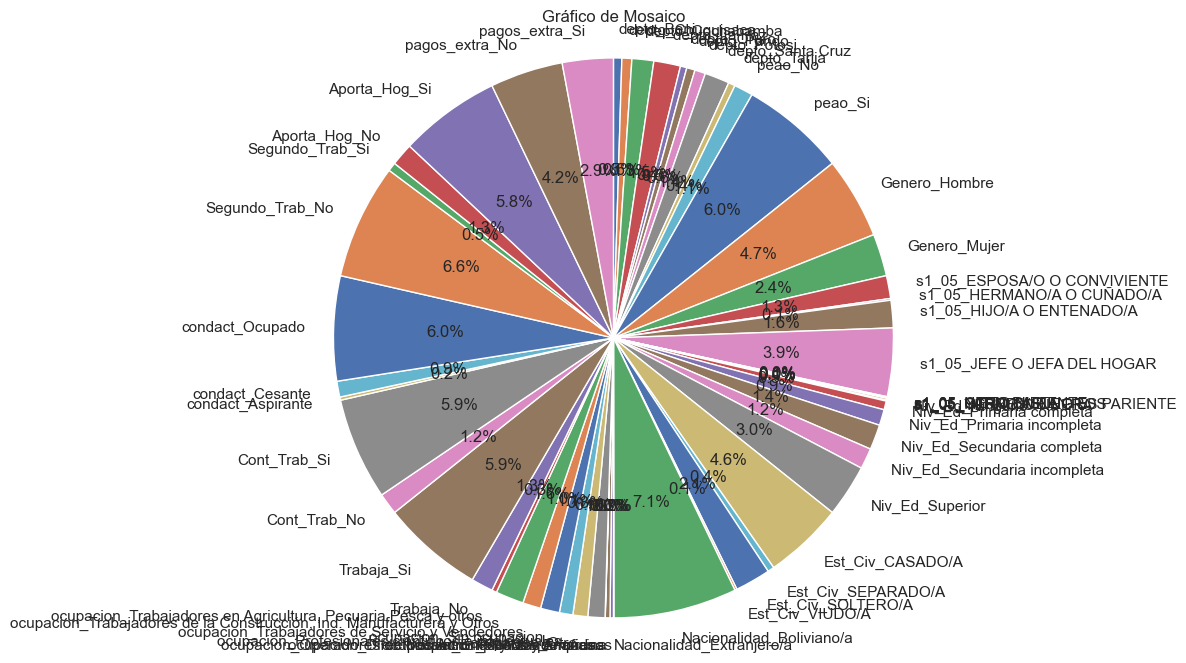

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_1 es tu DataFrame y variables_categoricas es la lista de columnas categóricas
df_subset = pd.get_dummies(df_1[variables_categoricas])

# Configurar el tamaño del gráfico si es necesario
plt.figure(figsize=(10, 8))

# Crear el gráfico de mosaico
plt.pie(df_subset.sum(), labels=df_subset.columns, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el gráfico
plt.title('Gráfico de Mosaico')
plt.show()


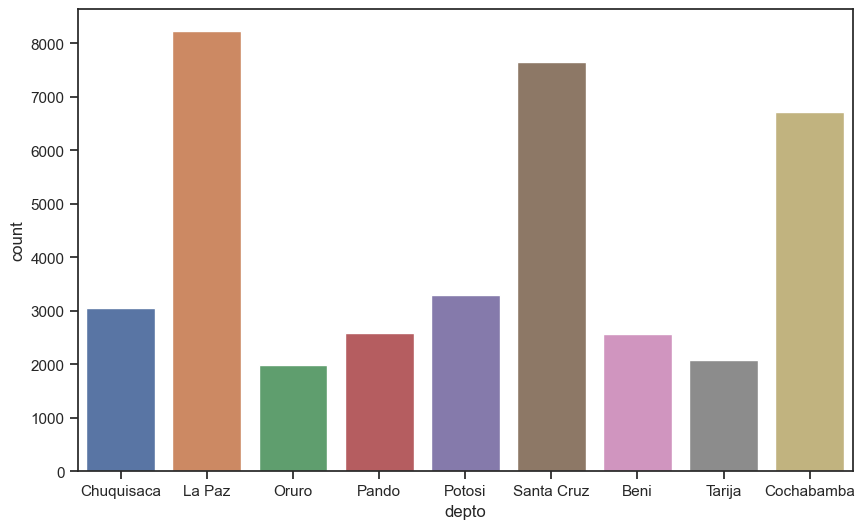

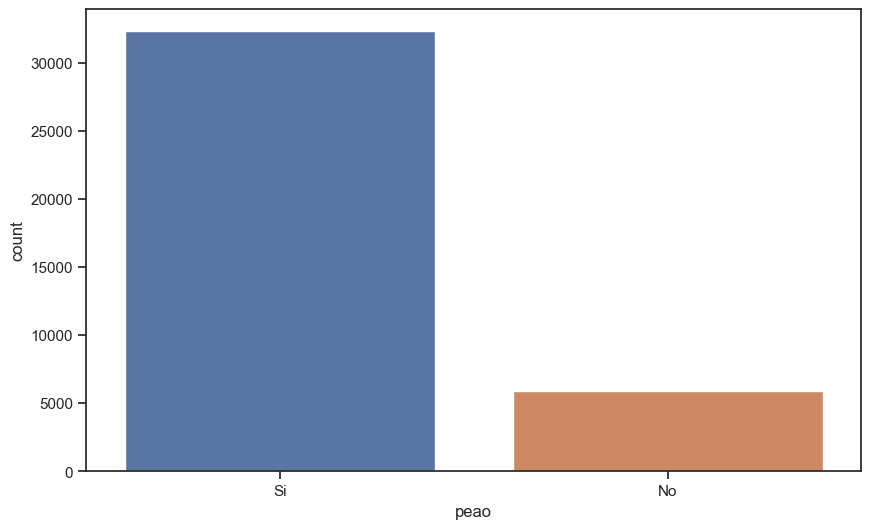

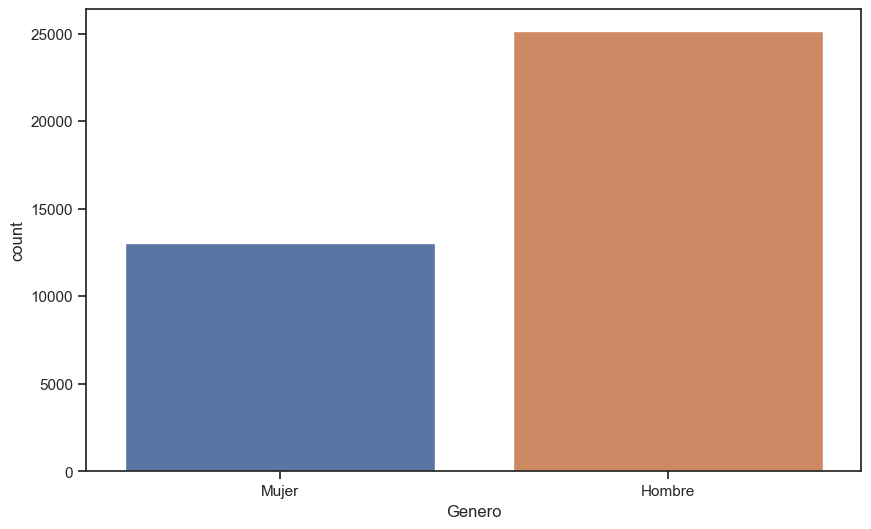

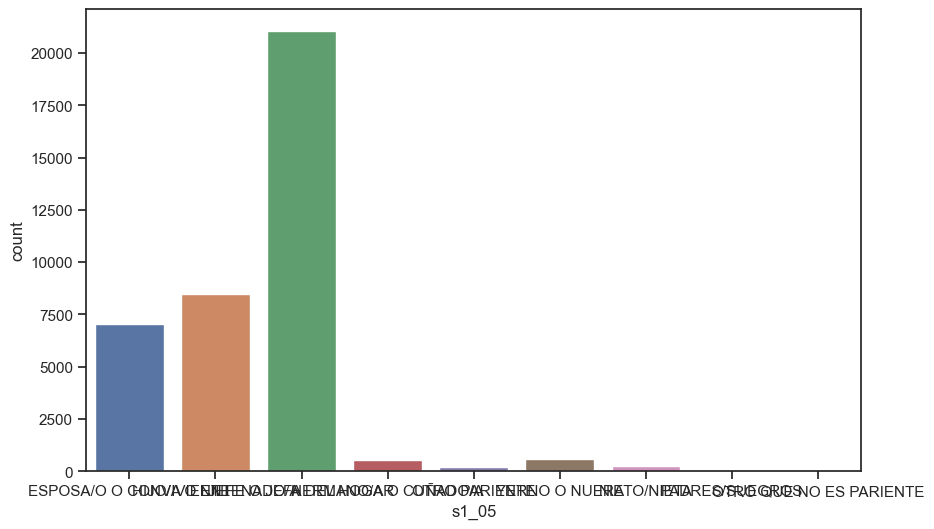

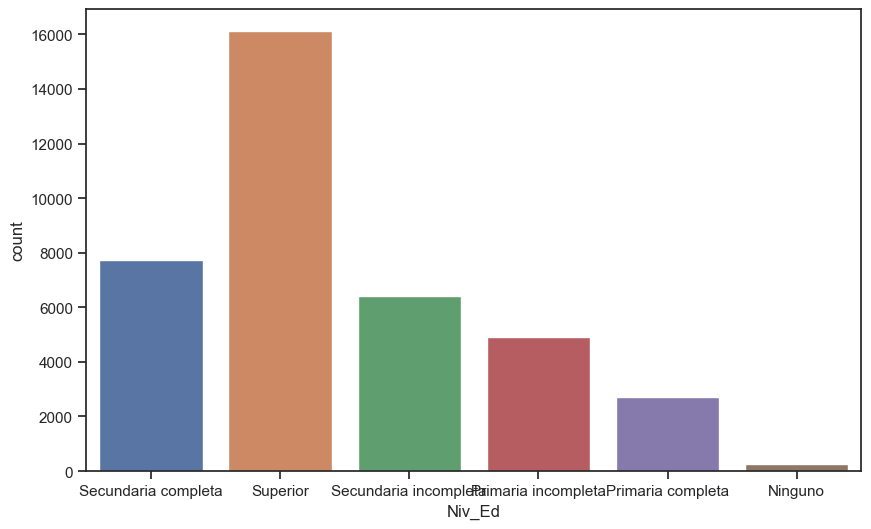

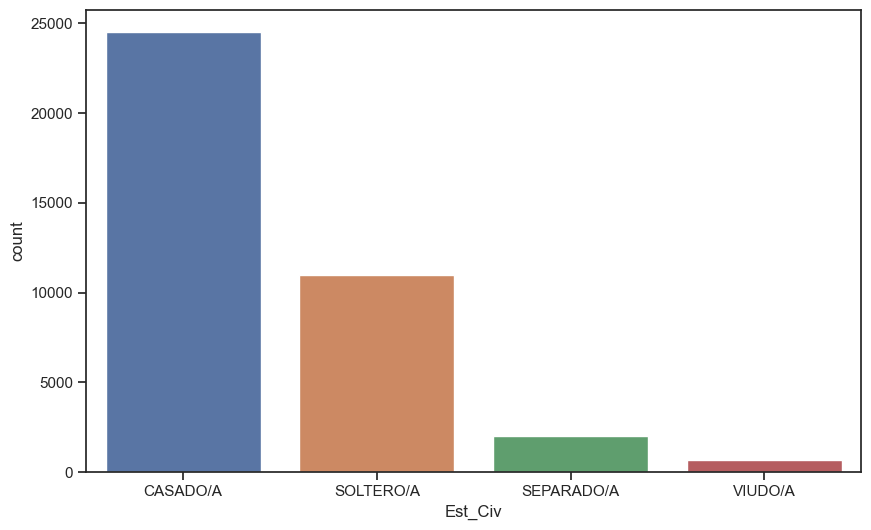

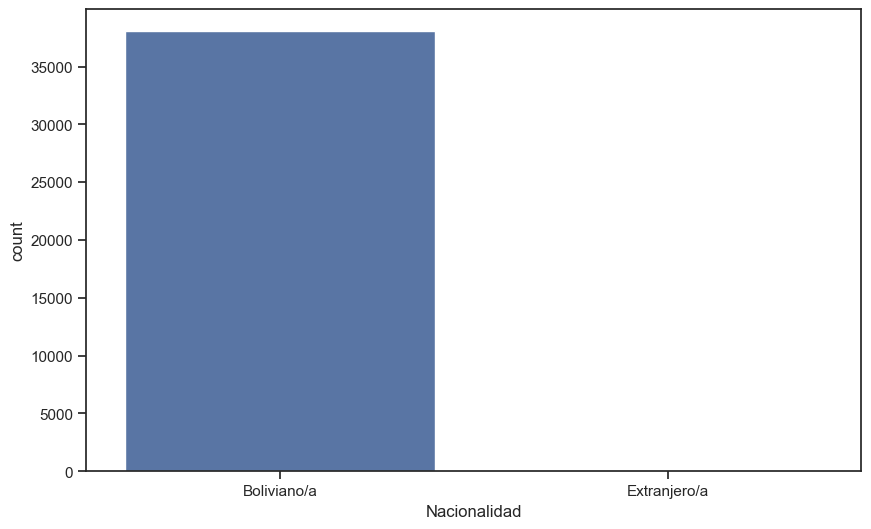

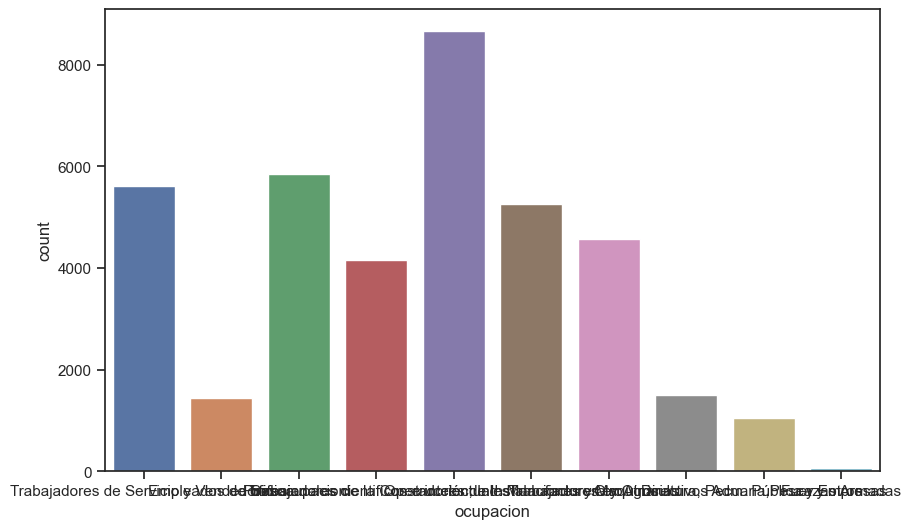

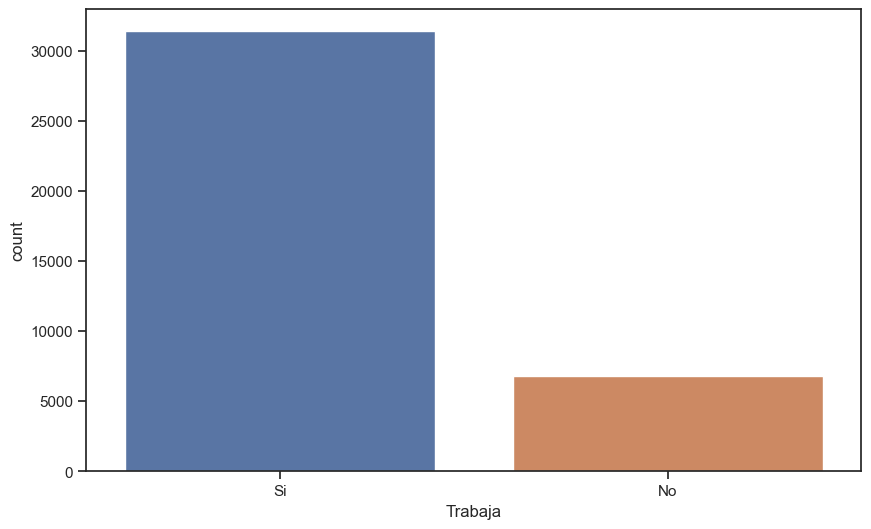

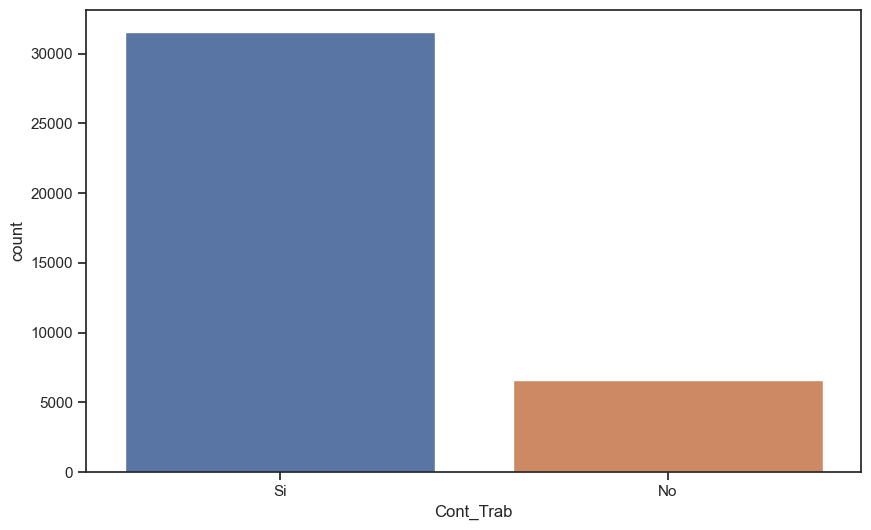

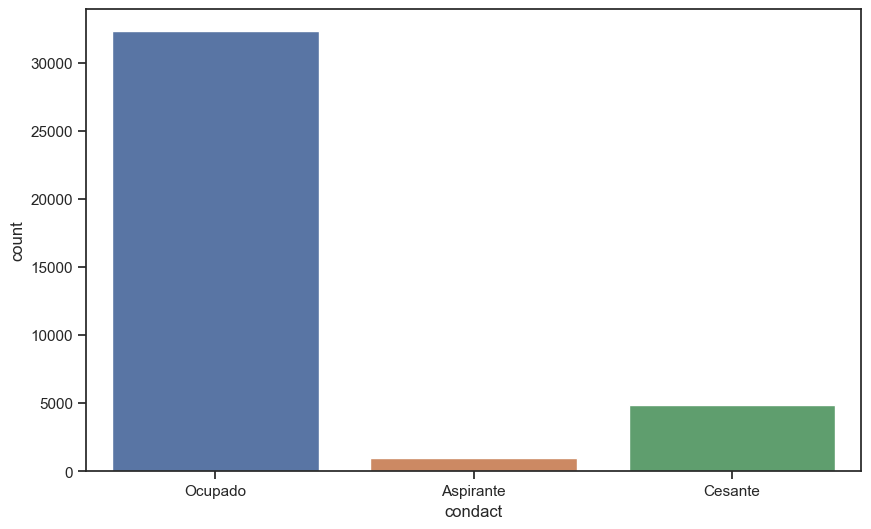

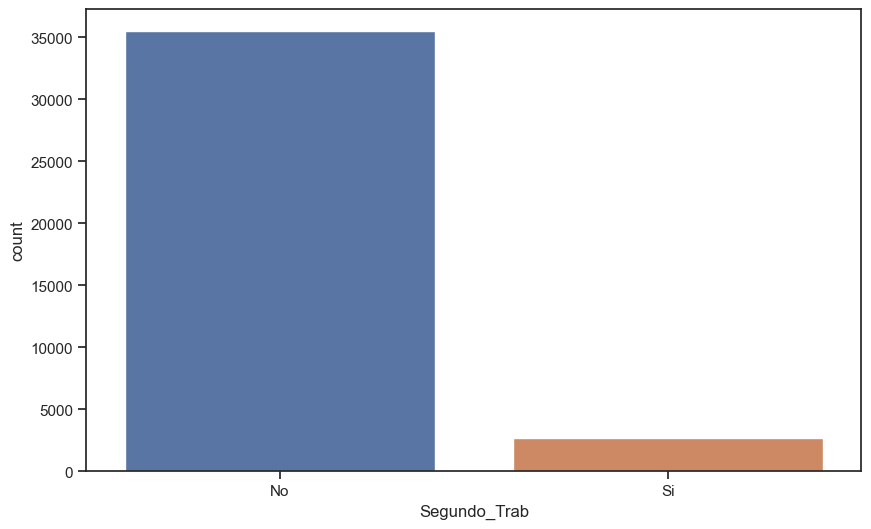

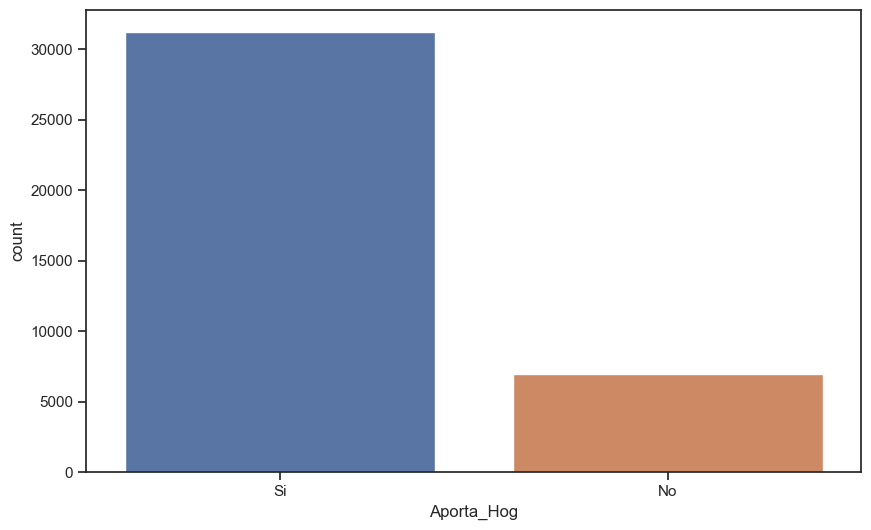

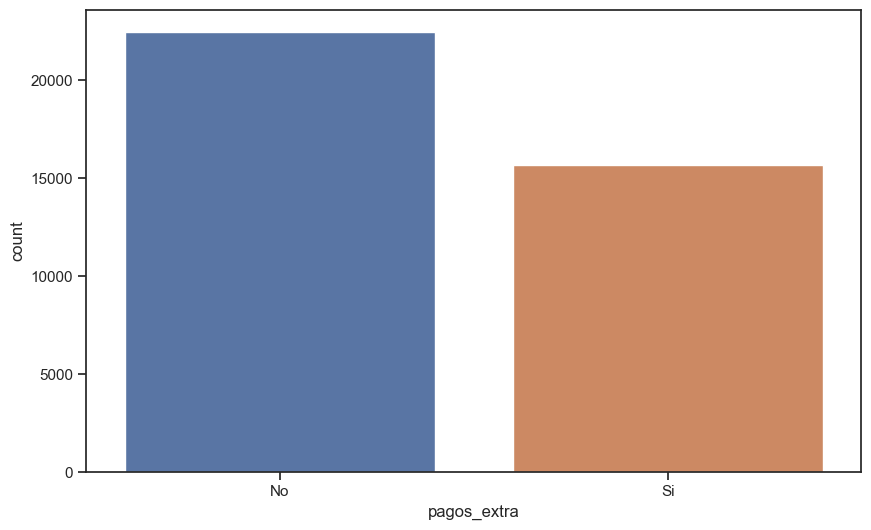

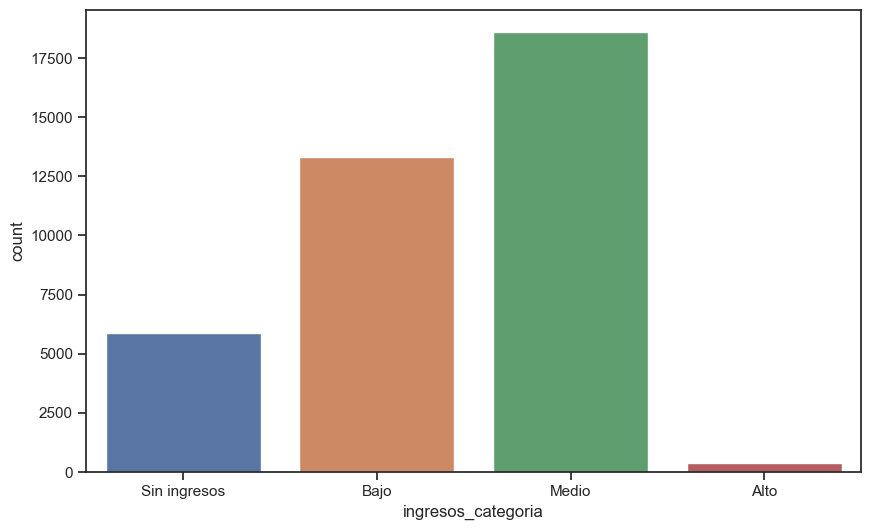

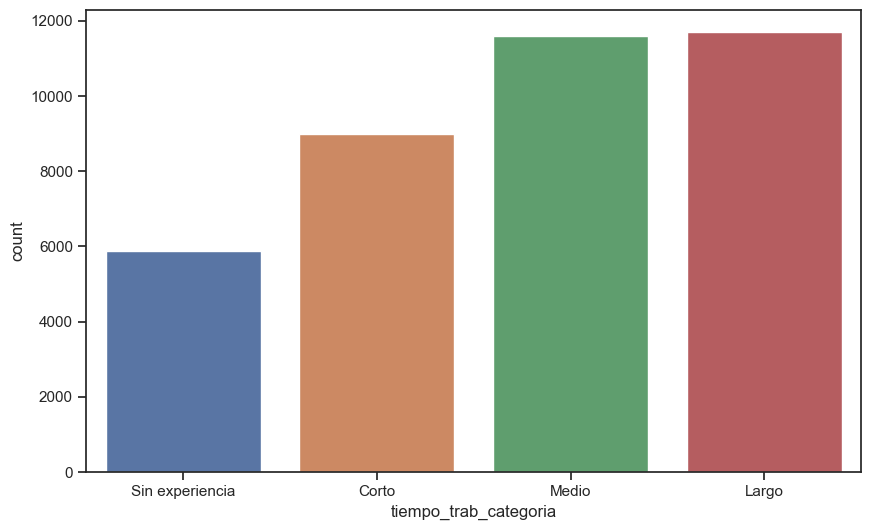

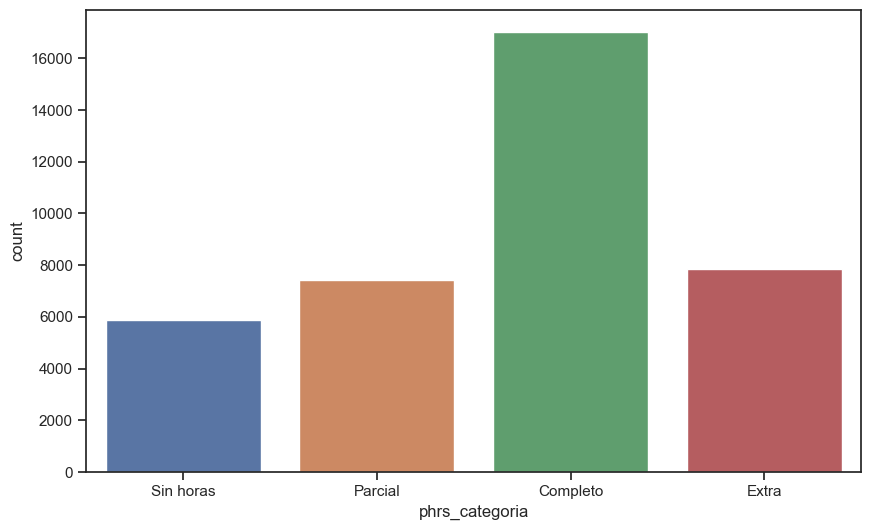

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_1.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_1)
    plt.show()



In [88]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Lista de tus variables categóricas
variables_categoricas = ['peao', 'Genero','depto','s1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion', 'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

# Bucle para realizar el análisis para cada variable
for variable in variables_categoricas:
    # Asegúrate de que la variable sea de tipo 'category'
    df_1[variable] = pd.Categorical(df_1[variable])

    # Crear una tabla de contingencia
    contingency_table = pd.crosstab(df_1[variable], df_1['tasa_desempleo'])

    # Imprimir la tabla de contingencia
    print(f"\nTabla de Contingencia para {variable}:")
    print(contingency_table)

    # Prueba de Chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi2: {chi2}, p-value: {p}")

    # Coeficiente de Contingencia (Cramér's V)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    print(f"Coeficiente de Contingencia (Cramér's V) para {variable}: {cramer_v}")

    # Análisis de tendencias (Promedio por Categoría)
    trend_analysis = df_1.groupby(variable)['tasa_desempleo'].mean()
    print(f"\nAnálisis de Tendencias para {variable}:")
    print(trend_analysis)



Tabla de Contingencia para peao:
tasa_desempleo  5.65   5.78  5.80   6.04
peao                                    
No              1370   1551  1495   1446
Si              3899  12873  3701  11830

Chi2: 1617.2641139186921, p-value: 0.0
Coeficiente de Contingencia (Cramér's V) para peao: 0.20566497736934272

Análisis de Tendencias para peao:
peao
No    5.818854
Si    5.861817
Name: tasa_desempleo, dtype: float64

Tabla de Contingencia para Genero:
tasa_desempleo  5.65  5.78  5.80  6.04
Genero                                
Hombre          3470  9677  3357  8631
Mujer           1799  4747  1839  4645

Chi2: 17.569609014898905, p-value: 0.0005395318010289322
Coeficiente de Contingencia (Cramér's V) para Genero: 0.01953870759965613

Análisis de Tendencias para Genero:
Genero
Hombre    5.854004
Mujer     5.857560
Name: tasa_desempleo, dtype: float64

Tabla de Contingencia para depto:
tasa_desempleo  5.65  5.78  5.80  6.04
depto                                 
Beni             290  1053 

In [216]:
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr
import numpy as np

# Crear tabla de contingencia para 'ingresos_categoria'
contingency_table_ingresos = pd.crosstab(df_1['ingresos_categoria'], df_1['tasa_desempleo'])
print("Tabla de Contingencia (Ingresos):")
print(contingency_table_ingresos)

# Prueba de Chi-cuadrado para 'ingresos_categoria'
chi2_ingresos, p_ingresos, _, _ = chi2_contingency(contingency_table_ingresos)
print(f"\nChi2 (Ingresos): {chi2_ingresos}, p-value: {p_ingresos}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_ingresos.sum().sum()
phi2_ingresos = chi2_ingresos / n
r, k = contingency_table_ingresos.shape
cramers_v_ingresos = np.sqrt(phi2_ingresos / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Ingresos): {cramers_v_ingresos}")

# Análisis de tendencias para 'ingresos_categoria'
trend_analysis_ingresos = df_1.groupby('ingresos_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Ingresos):")
print(trend_analysis_ingresos)

# Coeficiente de correlación de Spearman para 'ingresos_categoria'
spearman_corr_ingresos, _ = spearmanr(df_1['ingresos_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Ingresos): {spearman_corr_ingresos}")

# Repetir para 'tiempo_trab_categoria'

# Crear tabla de contingencia para 'tiempo_trab_categoria'
contingency_table_tiempo_trab = pd.crosstab(df_1['tiempo_trab_categoria'], df_1['tasa_desempleo'])
print("\nTabla de Contingencia (Tiempo de Trabajo):")
print(contingency_table_tiempo_trab)

# Prueba de Chi-cuadrado para 'tiempo_trab_categoria'
chi2_tiempo_trab, p_tiempo_trab, _, _ = chi2_contingency(contingency_table_tiempo_trab)
print(f"\nChi2 (Tiempo de Trabajo): {chi2_tiempo_trab}, p-value: {p_tiempo_trab}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_tiempo_trab.sum().sum()
phi2_tiempo_trab = chi2_tiempo_trab / n
r, k = contingency_table_tiempo_trab.shape
cramers_v_tiempo_trab = np.sqrt(phi2_tiempo_trab / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Tiempo de Trabajo): {cramers_v_tiempo_trab}")

# Análisis de tendencias para 'tiempo_trab_categoria'
trend_analysis_tiempo_trab = df_1.groupby('tiempo_trab_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Tiempo de Trabajo):")
print(trend_analysis_tiempo_trab)

# Coeficiente de correlación de Spearman para 'tiempo_trab_categoria'
spearman_corr_tiempo_trab, _ = spearmanr(df_1['tiempo_trab_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Tiempo de Trabajo): {spearman_corr_tiempo_trab}")

# Repetir para 'phrs_categoria'

# Crear tabla de contingencia para 'phrs_categoria'
contingency_table_phrs = pd.crosstab(df_1['phrs_categoria'], df_1['tasa_desempleo'])
print("\nTabla de Contingencia (Horas de Trabajo):")
print(contingency_table_phrs)

# Prueba de Chi-cuadrado para 'phrs_categoria'
chi2_phrs, p_phrs, _, _ = chi2_contingency(contingency_table_phrs)
print(f"\nChi2 (Horas de Trabajo): {chi2_phrs}, p-value: {p_phrs}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_phrs.sum().sum()
phi2_phrs = chi2_phrs / n
r, k = contingency_table_phrs.shape
cramers_v_phrs = np.sqrt(phi2_phrs / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Horas de Trabajo): {cramers_v_phrs}")

# Análisis de tendencias para 'phrs_categoria'
trend_analysis_phrs = df_1.groupby('phrs_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Horas de Trabajo):")
print(trend_analysis_phrs)

# Coeficiente de correlación de Spearman para 'phrs_categoria'
spearman_corr_phrs, _ = spearmanr(df_1['phrs_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Horas de Trabajo): {spearman_corr_phrs}")



Tabla de Contingencia (Ingresos):
tasa_desempleo      5.65  5.78  5.80  6.04
ingresos_categoria                        
Sin ingresos        1371  1551  1498  1446
Bajo                1747  5131  1715  4715
Medio               2117  7569  1952  6965
Alto                  34   173    31   150

Chi2 (Ingresos): 1701.7094340878793, p-value: 0.0

Coeficiente de Contingencia (Cramér's V) (Ingresos): 0.1219128383533065

Análisis de Tendencias (Ingresos):
ingresos_categoria
Sin ingresos    5.818815
Bajo            5.857629
Medio           5.864649
Alto            5.870722
Name: tasa_desempleo, dtype: float64

Coeficiente de Correlación de Spearman (Ingresos): 0.05784107928606207

Tabla de Contingencia (Tiempo de Trabajo):
tasa_desempleo         5.65  5.78  5.80  6.04
tiempo_trab_categoria                        
Sin experiencia        1371  1551  1498  1446
Corto                   644  3479   525  4344
Medio                  1101  5232  1095  4175
Largo                  2153  4162  2078  3311


In [217]:
from scipy.stats import chi2_contingency

# Crear una copia del DataFrame original
df_copy = df_1.copy()

categorical_variables = ['peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion', 
                          'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            # Crear tabla de contingencia
            contingency_table = pd.crosstab(df_copy[var1], df_copy[var2])

            # Realizar la prueba de chi-cuadrado
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Imprimir resultados
            print(f"Prueba de chi-cuadrado para '{var1}' vs '{var2}': Estadística = {chi2}, Valor p = {p}")

            # Puedes agregar aquí la lógica para usar el valor p y tomar decisiones


Prueba de chi-cuadrado para 'peao' vs 'Genero': Estadística = 891.2450138662971, Valor p = 7.853437677320372e-196
Prueba de chi-cuadrado para 'peao' vs 's1_05': Estadística = 2401.6448273971687, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Niv_Ed': Estadística = 185.23485967856675, Valor p = 4.0754791988808727e-38
Prueba de chi-cuadrado para 'peao' vs 'Est_Civ': Estadística = 1695.084012443536, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Nacionalidad': Estadística = 3.1084222170318, Valor p = 0.07788837855270549
Prueba de chi-cuadrado para 'peao' vs 'ocupacion': Estadística = 38095.9077152556, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Trabaja': Estadística = 32064.640591518608, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Cont_Trab': Estadística = 33025.4020921297, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'condact': Estadística = 38165.0, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Segundo_Trab': Estadística = 521.5882665700091, V

Prueba de chi-cuadrado para 'condact' vs 'Est_Civ': Estadística = 2114.0936344513552, Valor p = 0.0
Prueba de chi-cuadrado para 'condact' vs 'Nacionalidad': Estadística = 3.721672787952482, Valor p = 0.1555424811532888
Prueba de chi-cuadrado para 'condact' vs 'ocupacion': Estadística = 38095.948678242814, Valor p = 0.0
Prueba de chi-cuadrado para 'condact' vs 'Trabaja': Estadística = 32071.29276535226, Valor p = 0.0
Prueba de chi-cuadrado para 'condact' vs 'Cont_Trab': Estadística = 33032.21818378881, Valor p = 0.0
Prueba de chi-cuadrado para 'condact' vs 'Segundo_Trab': Estadística = 522.8581582831388, Valor p = 2.9026422990205492e-114
Prueba de chi-cuadrado para 'condact' vs 'Aporta_Hog': Estadística = 31188.446442181023, Valor p = 0.0
Prueba de chi-cuadrado para 'condact' vs 'pagos_extra': Estadística = 4838.08472175446, Valor p = 0.0
Prueba de chi-cuadrado para 'Segundo_Trab' vs 'peao': Estadística = 521.5882665700091, Valor p = 1.909828947142177e-115
Prueba de chi-cuadrado para 'S

In [218]:
from scipy.stats import levene
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'Est_Civ'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors = []

# Filtrar los datos para cada categoría de 'Est_Civ' y almacenar los vectores
categorias_est_civ = df_1['Est_Civ'].unique()

for categoria in categorias_est_civ:
    subset_data = df_1[df_1['Est_Civ'] == categoria]['tasa_desempleo']
    data_vectors.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat, p_value = levene(*data_vectors)

# Mostrar los resultados
print(f"Prueba de Levene para todos los datos: Estadística = {stat}, Valor p = {p_value}")



Prueba de Levene para todos los datos: Estadística = 5.201464497968632, Valor p = 0.0013685809505272083


In [219]:
from scipy.stats import f_oneway

# Suponiendo que 'tasa_desempleo' es tu variable dependiente y 'Est_Civ' es la variable categórica
grupo_categorias = [df_1['tasa_desempleo'][df_1['Est_Civ'] == categoria] for categoria in categorias_est_civ]

# Aplicar ANOVA
stat, p_value = f_oneway(*grupo_categorias)

# Mostrar resultados
print(f"ANOVA: Estadística F = {stat}, Valor p = {p_value}")


ANOVA: Estadística F = 41.37410903315545, Valor p = 1.1029185778568693e-26


In [220]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar prueba de Tukey
tukey_results = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['Est_Civ'])

# Mostrar resultados
print(tukey_results)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
  CASADO/A SEPARADO/A  -0.0018 0.9434 -0.0103  0.0066  False
  CASADO/A  SOLTERO/A  -0.0172    0.0 -0.0214  -0.013   True
  CASADO/A    VIUDO/A   0.0141  0.058 -0.0003  0.0286  False
SEPARADO/A  SOLTERO/A  -0.0154    0.0 -0.0242 -0.0065   True
SEPARADO/A    VIUDO/A    0.016 0.0596 -0.0004  0.0324  False
 SOLTERO/A    VIUDO/A   0.0314    0.0  0.0167   0.046   True
------------------------------------------------------------


In [221]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'depto'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_depto = []

# Filtrar los datos para cada categoría de 'depto' y almacenar los vectores
categorias_depto = df_1['depto'].unique()

for categoria in categorias_depto:
    subset_data = df_1[df_1['depto'] == categoria]['tasa_desempleo']
    data_vectors_depto.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_depto, p_value_depto = levene(*data_vectors_depto)

# Mostrar los resultados
print(f"Prueba de Levene para 'depto': Estadística = {stat_depto}, Valor p = {p_value_depto}")

# Aplicar ANOVA
grupo_categorias_depto = [df_1['tasa_desempleo'][df_1['depto'] == categoria] for categoria in categorias_depto]
stat_depto_anova, p_value_depto_anova = f_oneway(*grupo_categorias_depto)

# Mostrar resultados ANOVA
print(f"ANOVA para 'depto': Estadística F = {stat_depto_anova}, Valor p = {p_value_depto_anova}")

# Realizar prueba de Tukey
tukey_results_depto = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['depto'])

# Mostrar resultados Tukey
print(tukey_results_depto)



Prueba de Levene para 'depto': Estadística = 5.376549593282505, Valor p = 8.816531647103821e-07
ANOVA para 'depto': Estadística F = 10.791576954631791, Valor p = 2.6870585410197457e-15
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Beni Chuquisaca  -0.0196    0.0 -0.0314 -0.0078   True
      Beni Cochabamba   -0.004 0.9515 -0.0143  0.0062  False
      Beni     La Paz   0.0057 0.7085 -0.0043  0.0156  False
      Beni      Oruro  -0.0005    1.0 -0.0136  0.0127  False
      Beni      Pando   0.0018    1.0 -0.0105  0.0141  False
      Beni     Potosi  -0.0035 0.9915 -0.0151  0.0081  False
      Beni Santa Cruz  -0.0078 0.2777 -0.0179  0.0022  False
      Beni     Tarija  -0.0032  0.998 -0.0162  0.0099  False
Chuquisaca Cochabamba   0.0156    0.0   0.006  0.0252   True
Chuquisaca     La Paz   0.0253    0.0   0.016  0.0346   True
Chuquisaca      Oruro 

C:\Users\win10\anaconda3\jupyter\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [222]:
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'ocupacion'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_ocupacion = []

# Filtrar los datos para cada categoría de 'ocupacion' y almacenar los vectores
categorias_ocupacion = df_1['ocupacion'].unique()

for categoria in categorias_ocupacion:
    subset_data = df_1[df_1['ocupacion'] == categoria]['tasa_desempleo']
    data_vectors_ocupacion.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_ocupacion, p_value_ocupacion = levene(*data_vectors_ocupacion)

# Mostrar los resultados
print(f"Prueba de Levene para 'ocupacion': Estadística = {stat_ocupacion}, Valor p = {p_value_ocupacion}")

# Aplicar ANOVA
grupo_categorias_ocupacion = [df_1['tasa_desempleo'][df_1['ocupacion'] == categoria] for categoria in categorias_ocupacion]
stat_ocupacion_anova, p_value_ocupacion_anova = f_oneway(*grupo_categorias_ocupacion)

# Mostrar resultados ANOVA
print(f"ANOVA para 'ocupacion': Estadística F = {stat_ocupacion_anova}, Valor p = {p_value_ocupacion_anova}")

# Realizar prueba de Tukey
tukey_results_ocupacion = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['ocupacion'])

# Mostrar resultados Tukey
print(tukey_results_ocupacion)


Prueba de Levene para 'ocupacion': Estadística = 9.384082512589673, Valor p = 2.1783184367336398e-14
ANOVA para 'ocupacion': Estadística F = 54.598576017677296, Valor p = 1.8431225588200217e-99
                                                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                      
                           group1                                                      group2                           meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------------------------------------------------------
                         Directivos Adm. Pública y Empresas                                        Empleados de oficina  -0.0028    1.0 -0.0209  0.0153  False
                         Directivos Adm. Pública y Empresas                                             Fuerzas Armadas   0.0007    1.0 -0.0578  0.0591  False
           

In [223]:
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'condact'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_condact = []

# Filtrar los datos para cada categoría de 'condact' y almacenar los vectores
categorias_condact = df_1['condact'].unique()

for categoria in categorias_condact:
    subset_data = df_1[df_1['condact'] == categoria]['tasa_desempleo']
    data_vectors_condact.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_condact, p_value_condact = levene(*data_vectors_condact)

# Mostrar los resultados
print(f"Prueba de Levene para 'condact': Estadística = {stat_condact}, Valor p = {p_value_condact}")

# Aplicar ANOVA
grupo_categorias_condact = [df_1['tasa_desempleo'][df_1['condact'] == categoria] for categoria in categorias_condact]
stat_condact_anova, p_value_condact_anova = f_oneway(*grupo_categorias_condact)

# Mostrar resultados ANOVA
print(f"ANOVA para 'condact': Estadística F = {stat_condact_anova}, Valor p = {p_value_condact_anova}")

# Realizar prueba de Tukey
tukey_results_condact = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['condact'])

# Mostrar resultados Tukey
print(tukey_results_condact)


Prueba de Levene para 'condact': Estadística = 84.25463767462391, Valor p = 3.084790163393157e-37
ANOVA para 'condact': Estadística F = 261.7952357174204, Valor p = 1.1931084487878868e-113
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
  group1   group2 meandiff p-adj lower  upper  reject
-----------------------------------------------------
Aspirante Cesante     0.04   0.0 0.0284 0.0516   True
Aspirante Ocupado   0.0763   0.0 0.0655 0.0871   True
  Cesante Ocupado   0.0363   0.0 0.0312 0.0414   True
-----------------------------------------------------


In [224]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_s1_05 = []

# Filtrar los datos para cada categoría de 's1_05' y almacenar los vectores
categorias_s1_05 = df_1['s1_05'].unique()

for categoria in categorias_s1_05:
    subset_data = df_1[df_1['s1_05'] == categoria]['tasa_desempleo']
    data_vectors_s1_05.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_s1_05, p_value_s1_05 = levene(*data_vectors_s1_05)

# Mostrar los resultados
print(f"Prueba de Levene para 's1_05': Estadística = {stat_s1_05}, Valor p = {p_value_s1_05}")

# Aplicar ANOVA
grupo_categorias_s1_05 = [df_1['tasa_desempleo'][df_1['s1_05'] == categoria] for categoria in categorias_s1_05]
stat_s1_05_anova, p_value_s1_05_anova = f_oneway(*grupo_categorias_s1_05)

# Mostrar resultados ANOVA
print(f"ANOVA para 's1_05': Estadística F = {stat_s1_05_anova}, Valor p = {p_value_s1_05_anova}")

# Realizar prueba de Tukey
tukey_results_s1_05 = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['s1_05'])

# Mostrar resultados Tukey
print(tukey_results_s1_05)



Prueba de Levene para 's1_05': Estadística = 22.67397287448863, Valor p = 6.421200495556948e-35
ANOVA para 's1_05': Estadística F = 59.75643727721972, Valor p = 1.527248249900001e-97
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
 ESPOSA/O O CONVIVIENTE    HERMANO/A O CUÑADO/A  -0.0306 0.0001 -0.0504 -0.0109   True
 ESPOSA/O O CONVIVIENTE     HIJO/A O ENTENADO/A  -0.0316    0.0 -0.0387 -0.0245   True
 ESPOSA/O O CONVIVIENTE   JEFE O JEFA DEL HOGAR   0.0036 0.6411 -0.0024  0.0097  False
 ESPOSA/O O CONVIVIENTE             NIETO/NIETA  -0.0315 0.0216 -0.0606 -0.0025   True
 ESPOSA/O O CONVIVIENTE           OTRO PARIENTE  -0.0441 0.0017  -0.078 -0.0103   True
 ESPOSA/O O CONVIVIENTE OTRO QUE NO ES PARIENTE  -0.0267 0.9556 -0.0954   0.042  False
 ESPOSA/O O CONVIVIENTE          P

In [225]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_genero = []

# Filtrar los datos para cada categoría de 'Genero' y almacenar los vectores
categorias_genero = df_1['Genero'].unique()

for categoria in categorias_genero:
    subset_data = df_1[df_1['Genero'] == categoria]['tasa_desempleo']
    data_vectors_genero.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_genero, p_value_genero = levene(*data_vectors_genero)

# Mostrar los resultados
print(f"Prueba de Levene para 'Genero': Estadística = {stat_genero}, Valor p = {p_value_genero}")

# Aplicar ANOVA
grupo_categorias_genero = [df_1['tasa_desempleo'][df_1['Genero'] == categoria] for categoria in categorias_genero]
stat_genero_anova, p_value_genero_anova = f_oneway(*grupo_categorias_genero)

# Mostrar resultados ANOVA
print(f"ANOVA para 'Genero': Estadística F = {stat_genero_anova}, Valor p = {p_value_genero_anova}")

# Realizar prueba de Tukey
tukey_results_genero = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['Genero'])

# Mostrar resultados Tukey
print(tukey_results_genero)



Prueba de Levene para 'Genero': Estadística = 8.018563297407145, Valor p = 0.0046324510732693785
ANOVA para 'Genero': Estadística F = 5.360054666012257, Valor p = 0.020608404718296103
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
Hombre  Mujer   0.0036 0.0206 0.0005 0.0066   True
--------------------------------------------------


In [226]:
# Muestra los tipos de datos de cada columna
print(df_1.dtypes)


gestion                     int64
trimestre                   int64
id_persona                  int64
depto                      object
peao                     category
Genero                   category
Edad                        int64
s1_05                    category
Niv_Ed                   category
Est_Civ                  category
Nacionalidad             category
ocupacion                category
Trabaja                  category
Cont_Trab                category
condact                  category
phrs                      float64
Segundo_Trab             category
Aporta_Hog               category
tiempo_trab_meses         float64
ingresos                  float64
pagos_extra              category
tasa_desempleo            float64
ingresos_categoria       category
tiempo_trab_categoria    category
phrs_categoria           category
dtype: object


In [227]:
df_cleaned=df_1.copy()

# Columnas numéricas con valores nulos
columnas_numericas = ['phrs', 'tiempo_trab_meses', 'ingresos']

# Convierte las columnas a tipo numérico
df_cleaned[columnas_numericas] = df_cleaned[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Muestra información sobre los valores nulos y los tipos de datos después de la conversión
print(df_cleaned.info())

# Llena los valores nulos con una estrategia específica (por ejemplo, usando la media)
df_cleaned[columnas_numericas].fillna(df[columnas_numericas].mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 38165 entries, 1 to 114002
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                38165 non-null  int64   
 1   trimestre              38165 non-null  int64   
 2   id_persona             38165 non-null  int64   
 3   depto                  38165 non-null  object  
 4   peao                   38165 non-null  category
 5   Genero                 38165 non-null  category
 6   Edad                   38165 non-null  int64   
 7   s1_05                  38165 non-null  category
 8   Niv_Ed                 38165 non-null  category
 9   Est_Civ                38165 non-null  category
 10  Nacionalidad           38165 non-null  category
 11  ocupacion              38165 non-null  category
 12  Trabaja                38165 non-null  category
 13  Cont_Trab              38165 non-null  category
 14  condact                38165 non-null  cat

C:\Users\win10\AppData\Local\Temp\ipykernel_18604\757142728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columnas_numericas].fillna(df[columnas_numericas].mean(), inplace=True)


In [228]:
# Elimina las filas con valores nulos
df_cleaned.dropna(inplace=True)

# Verifica el nuevo estado del DataFrame
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 32299 entries, 1 to 114002
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                32299 non-null  int64   
 1   trimestre              32299 non-null  int64   
 2   id_persona             32299 non-null  int64   
 3   depto                  32299 non-null  object  
 4   peao                   32299 non-null  category
 5   Genero                 32299 non-null  category
 6   Edad                   32299 non-null  int64   
 7   s1_05                  32299 non-null  category
 8   Niv_Ed                 32299 non-null  category
 9   Est_Civ                32299 non-null  category
 10  Nacionalidad           32299 non-null  category
 11  ocupacion              32299 non-null  category
 12  Trabaja                32299 non-null  category
 13  Cont_Trab              32299 non-null  category
 14  condact                32299 non-null  cat

In [229]:
# Convertir todos los valores de la columna 'phrs' a cadenas
df_cleaned['phrs'] = df_cleaned['phrs'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'phrs'
df_cleaned['phrs'] = df_cleaned['phrs'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'phrs'
print("Valores únicos en la columna 'phrs':")
print(df_cleaned['phrs'].unique())

# Verificar la cantidad de valores nulos en la columna 'phrs'
print("Cantidad de valores nulos en la columna 'phrs':")
print(df_cleaned['phrs'].isnull().sum())

# Convertir todos los valores de la columna 'ingresos' a cadenas
df_cleaned['ingresos'] = df_cleaned['ingresos'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'ingresos'
df_cleaned['ingresos'] = df_cleaned['ingresos'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'ingresos'
print("Valores únicos en la columna 'ingresos':")
print(df_cleaned['ingresos'].unique())

# Verificar la cantidad de valores nulos en la columna 'ingresos'
print("Cantidad de valores nulos en la columna 'ingresos':")
print(df_cleaned['ingresos'].isnull().sum())

# Convertir todos los valores de la columna 'tiempo_trab_meses' a cadenas
df_cleaned['tiempo_trab_meses'] = df_cleaned['tiempo_trab_meses'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'tiempo_trab_meses'
df_cleaned['tiempo_trab_meses'] = df_cleaned['tiempo_trab_meses'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'tiempo_trab_meses'
print("Valores únicos en la columna 'tiempo_trab_meses':")
print(df_cleaned['tiempo_trab_meses'].unique())

# Verificar la cantidad de valores nulos en la columna 'tiempo_trab_meses'
print("Cantidad de valores nulos en la columna 'tiempo_trab_meses':")
print(df_cleaned['tiempo_trab_meses'].isnull().sum())


Valores únicos en la columna 'phrs':
['36.0' '48.0' '40.0' '55.0' '72.0' '16.0' '75.0' '47.5' '30.0' '50.0'
 '66.0' '44.0' '60.0' '56.0' '6.0' '35.0' '31.25' '24.0' '52.0' '54.0'
 '4.0' '6.25' '63.0' '32.0' '15.0' '25.0' '45.0' '20.0' '49.0' '10.0'
 '9.0' '18.0' '70.0' '28.0' '31.0' '14.0' '42.0' '51.0' '7.0' '39.0'
 '49.5' '8.5' '12.0' '21.0' '69.0' '27.0' '38.5' '45.5' '77.0' '71.5'
 '33.0' '32.5' '5.0' '8.0' '60.5' '65.0' '11.0' '42.5' '16.5' '46.75'
 '12.5' '31.5' '22.5' '27.5' '46.25' '22.0' '25.5' '3.5' '2.0' '40.5'
 '24.75' '58.5' '3.0' '64.0' '26.0' '17.5' '52.25' '59.5' '61.5' '18.5'
 '24.5' '13.0' '45.375' '57.0' '52.5' '23.75' '21.25' '35.75' '73.5'
 '41.25' '16.25' '37.5' '66.5' '7.5' '46.0' '13.5']
Cantidad de valores nulos en la columna 'phrs':
0
Valores únicos en la columna 'ingresos':
['2400.0' '2200.0' '4200.0' ... '6680.0' '5298.0' '5136.0']
Cantidad de valores nulos en la columna 'ingresos':
0
Valores únicos en la columna 'tiempo_trab_meses':
['121.0' '242.0' '241.0'

In [230]:
df_1['Edad'] = df_1['Edad'].astype('float64')

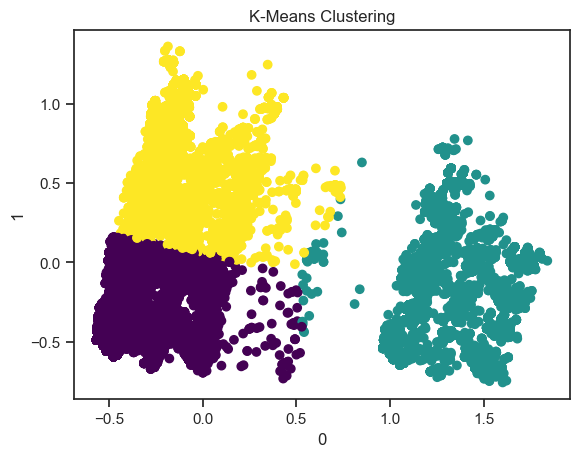

          0         1  Edad  tiempo_trab_meses  ingresos  phrs
0 -0.153537  0.806402  22.0              121.0    2400.0  36.0
1  0.141036  0.062923  27.0              121.0    2200.0  48.0
2  1.762847 -0.014278  22.0                NaN       NaN   NaN
3  1.637040 -0.432893  27.0                NaN       NaN   NaN
4  1.594055 -0.669197  21.0                NaN       NaN   NaN


In [231]:
import pandas as pd
from prince import MCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# DataFrame original
df_original = df_1.copy()

# Variables categóricas
categorical_vars = ['depto', 'Genero', 'Niv_Ed','s1_05', 'Est_Civ', 'ocupacion', 'Trabaja', 'condact']

# Lidiar con valores faltantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
df_original[categorical_vars] = imputer.fit_transform(df_original[categorical_vars])

# Lidiar con valores infinitos (inf)
df_original.replace([np.inf, -np.inf], np.nan, inplace=True)

# Realizar el Análisis de Correspondencia Múltiple (MCA) para las variables categóricas
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df_original[categorical_vars])

# Combinar las variables MCA con las numéricas
combined_data = pd.concat([mca_results, df_original[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]], axis=1)

# Convertir todos los nombres de columnas a cadenas
combined_data.columns = combined_data.columns.astype(str)

# Imputar valores NaN con la media para todas las columnas numéricas
imputer = SimpleImputer(strategy='mean')
imputed_values = imputer.fit_transform(combined_data)

# Crear un DataFrame con los valores imputados
combined_data_imputed = pd.DataFrame(imputed_values, columns=combined_data.columns)

# Aplicar K-Means Clustering solo en las variables MCA
kmeans = KMeans(n_clusters=3)
# Utilizar los nombres de las columnas del MCA resultante
cluster_columns = mca_results.columns.astype(str)
combined_data_imputed['cluster'] = kmeans.fit_predict(combined_data_imputed[cluster_columns])

# Visualizar los resultados
plt.scatter(combined_data_imputed[cluster_columns[0]], combined_data_imputed[cluster_columns[1]], c=combined_data_imputed['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel(cluster_columns[0])
plt.ylabel(cluster_columns[1])
plt.show()

# Ajustar los índices antes de asignar la columna 'cluster'
combined_data = combined_data.reset_index(drop=True)

# Asegurarse de que 'cluster' esté presente en 'combined_data_imputed' antes de la asignación
if 'cluster' in combined_data_imputed.columns:
    # Asegurarse de que 'cluster' esté presente en 'combined_data' antes de la asignación
    if 'cluster' in combined_data.columns:
        combined_data['cluster'] = combined_data_imputed['cluster']

# Mostrar el DataFrame con la información del clúster
print(combined_data.head())



Composición de Clústeres para depto:
cluster      0.0   1.0   2.0  Total
depto                              
Beni         194    90   133    417
Chuquisaca   411   141   271    823
Cochabamba   598   148   417   1163
La Paz       690   199   431   1320
Oruro        188    59   111    358
Pando        263    79   179    521
Potosi       310   108   230    648
Santa Cruz   754   262   543   1559
Tarija       190    52   134    376
Total       3598  1138  2449   7185



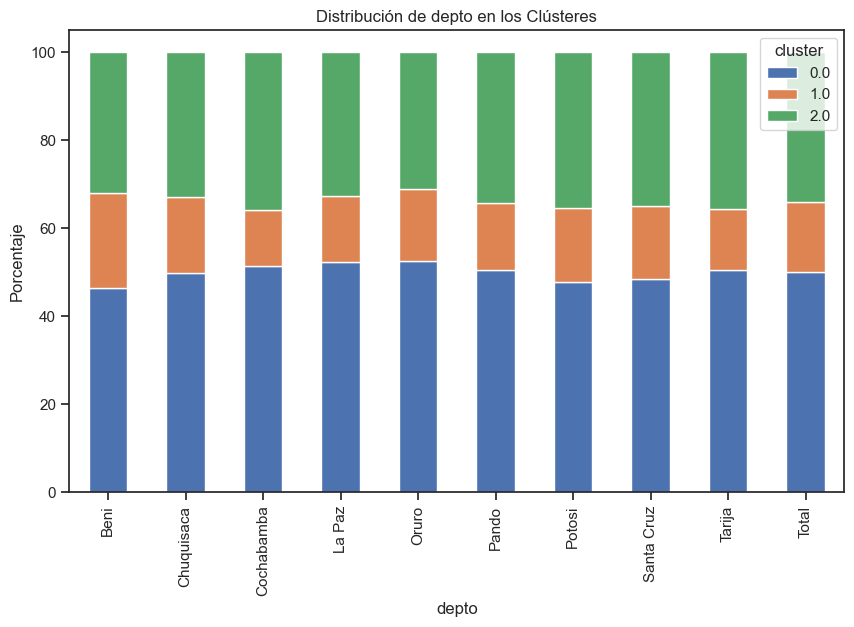


Composición de Clústeres para Genero:
cluster   0.0   1.0   2.0  Total
Genero                          
Hombre   2337   745  1554   4636
Mujer    1261   393   895   2549
Total    3598  1138  2449   7185



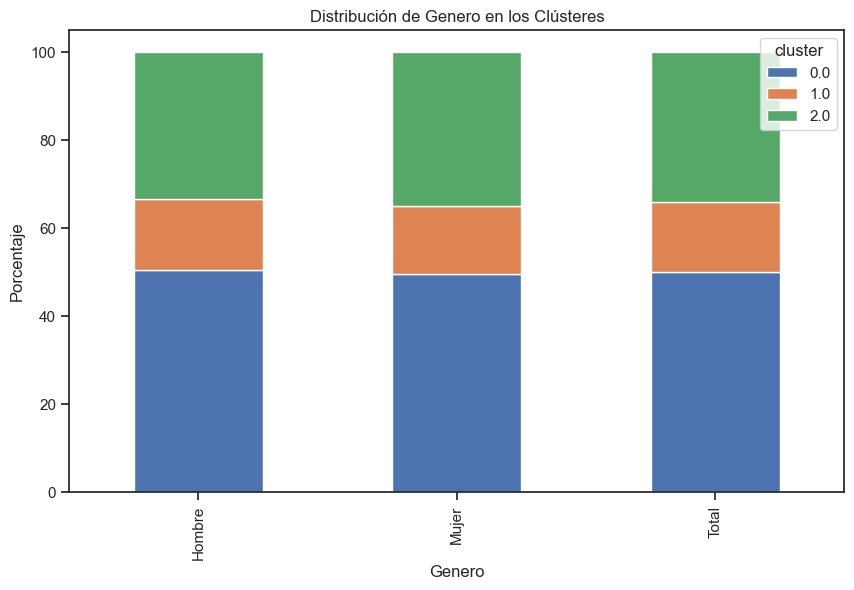


Composición de Clústeres para Niv_Ed:
cluster                 0.0   1.0   2.0  Total
Niv_Ed                                        
Ninguno                  26     3    11     40
Primaria completa       177    53   122    352
Primaria incompleta     475   160   302    937
Secundaria completa     803   249   538   1590
Secundaria incompleta   618   224   416   1258
Superior               1499   449  1060   3008
Total                  3598  1138  2449   7185



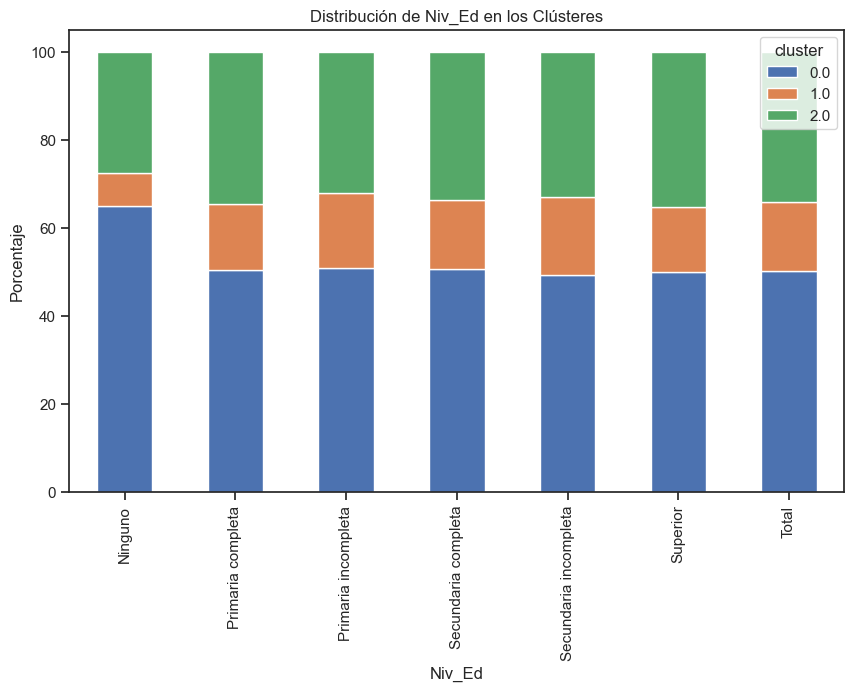


Composición de Clústeres para s1_05:
cluster                   0.0   1.0   2.0  Total
s1_05                                           
ESPOSA/O O CONVIVIENTE    602   189   395   1186
HERMANO/A O CUÑADO/A       87    34    50    171
HIJO/A O ENTENADO/A      1111   377   788   2276
JEFE O JEFA DEL HOGAR    1637   494  1108   3239
NIETO/NIETA                40    11    26     77
OTRO PARIENTE              24     8    16     48
OTRO QUE NO ES PARIENTE     6     2     3     11
PADRES/SUEGROS              8     1     3     12
YERNO O NUERA              83    22    60    165
Total                    3598  1138  2449   7185



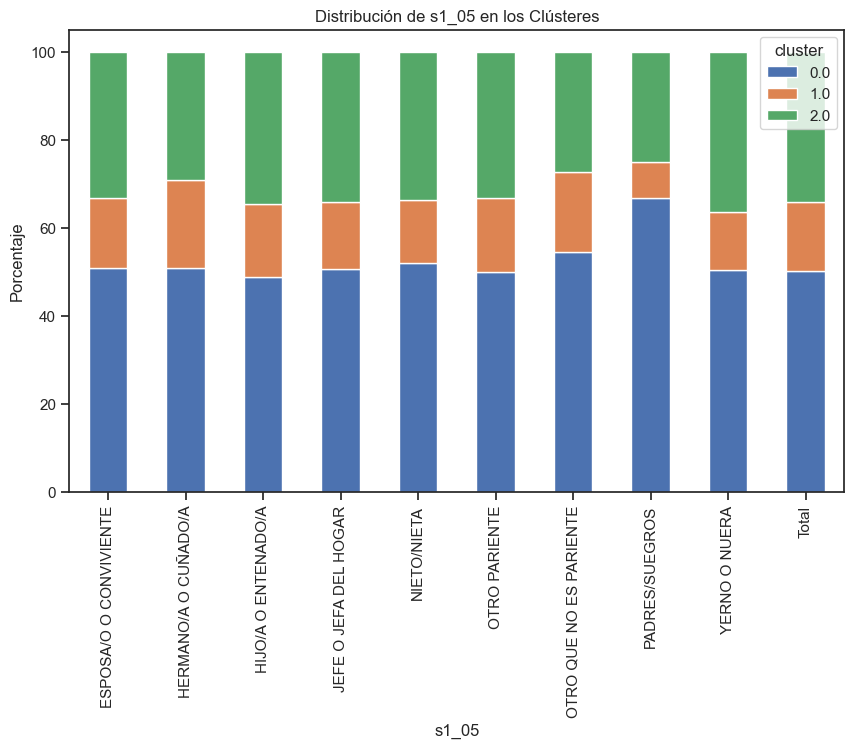


Composición de Clústeres para Est_Civ:
cluster      0.0   1.0   2.0  Total
Est_Civ                            
CASADO/A    2055   631  1395   4081
SEPARADO/A   155    45   104    304
SOLTERO/A   1345   446   921   2712
VIUDO/A       43    16    29     88
Total       3598  1138  2449   7185



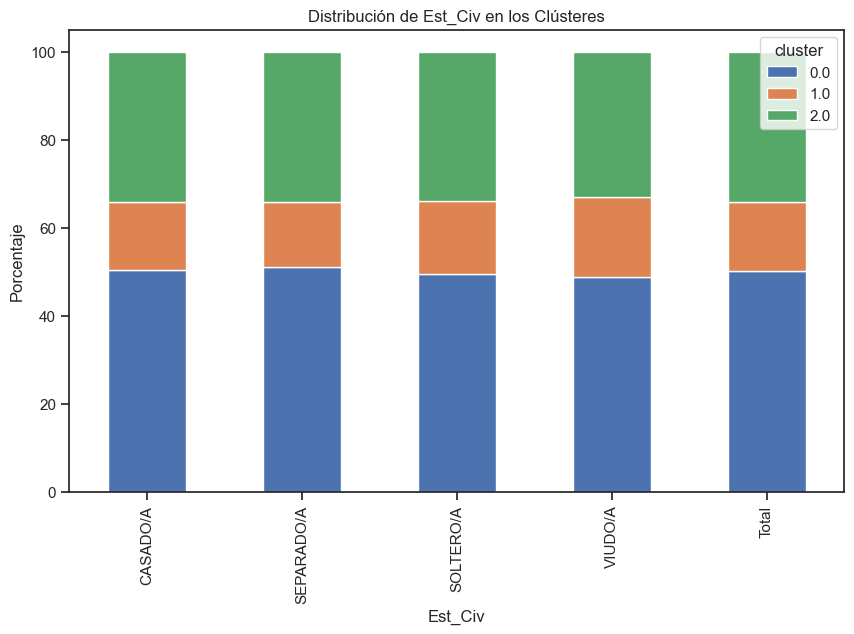


Composición de Clústeres para ocupacion:
cluster                                              0.0   1.0   2.0  Total
ocupacion                                                                  
Directivos Adm. Pública y Empresas                    84    31    56    171
Empleados de oficina                                 124    40    94    258
Fuerzas Armadas                                        3     0     4      7
Operadores de Instalaciones y Maquinarias            385   107   259    751
Otro                                                 408   129   303    840
Profesionales cientificos e intelectuales            374   111   246    731
Sin ocupacion                                       1063   322   654   2039
Trabajadores de Servicio y Vendedores                378   121   260    759
Trabajadores de la Construcción, Ind. Manufactu...   693   248   511   1452
Trabajadores en Agricultura, Pecuaria,Pesca y o...    86    29    62    177
Total                                         

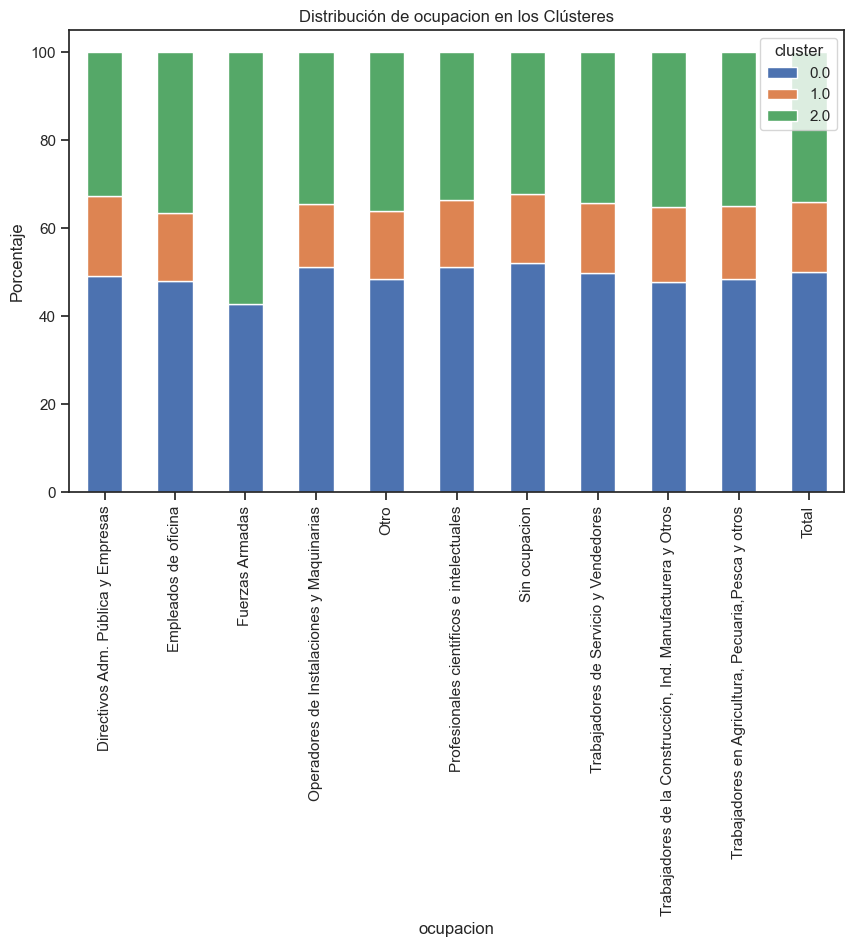


Composición de Clústeres para Trabaja:
cluster   0.0   1.0   2.0  Total
Trabaja                         
No       1143   338   694   2175
Si       2455   800  1755   5010
Total    3598  1138  2449   7185



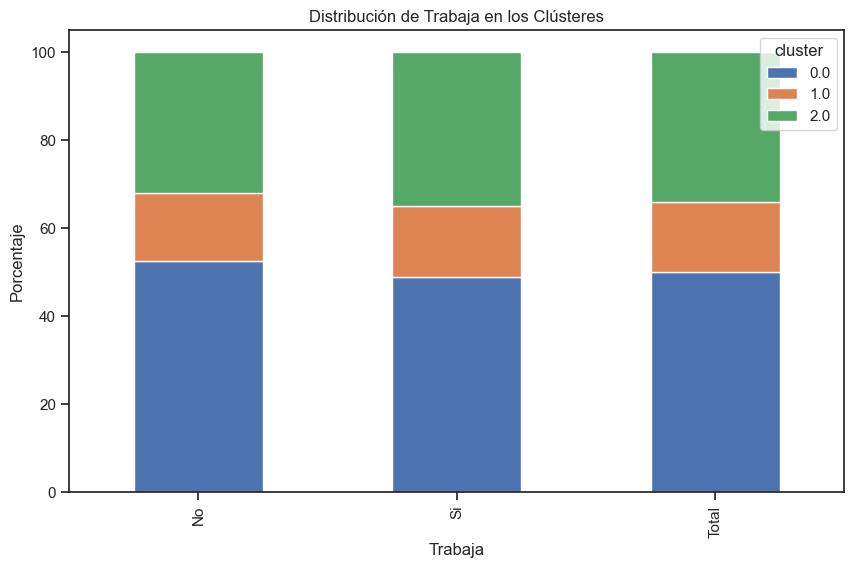


Composición de Clústeres para condact:
cluster     0.0   1.0   2.0  Total
condact                           
Aspirante   291    87   159    537
Cesante     776   236   497   1509
Ocupado    2531   815  1793   5139
Total      3598  1138  2449   7185



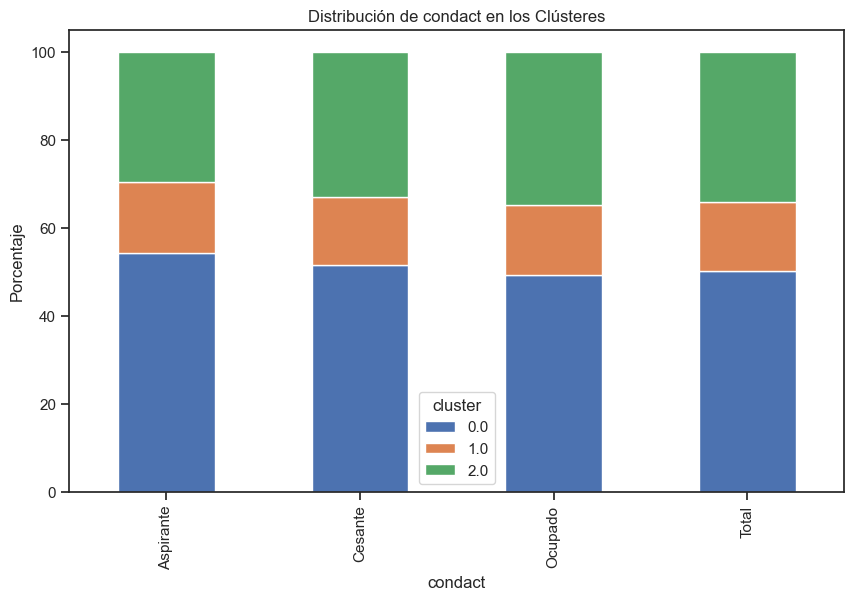

In [232]:
# Crear un DataFrame con las variables categóricas y la información del clúster
cluster_info = pd.concat([df_original[categorical_vars], combined_data_imputed['cluster']], axis=1)

# Analizar la composición de clústeres con respecto a variables categóricas
for var in categorical_vars:
    cross_tab = pd.crosstab(cluster_info[var], cluster_info['cluster'], margins=True, margins_name='Total')
    print(f"\nComposición de Clústeres para {var}:\n{cross_tab}\n")

    # Graficar barras apiladas
    cross_tab_percentage = cross_tab.div(cross_tab['Total'], axis=0) * 100
    cross_tab_percentage.drop('Total', axis=1, inplace=True)
    cross_tab_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Distribución de {var} en los Clústeres')
    plt.xlabel(var)
    plt.ylabel('Porcentaje')
    plt.show()


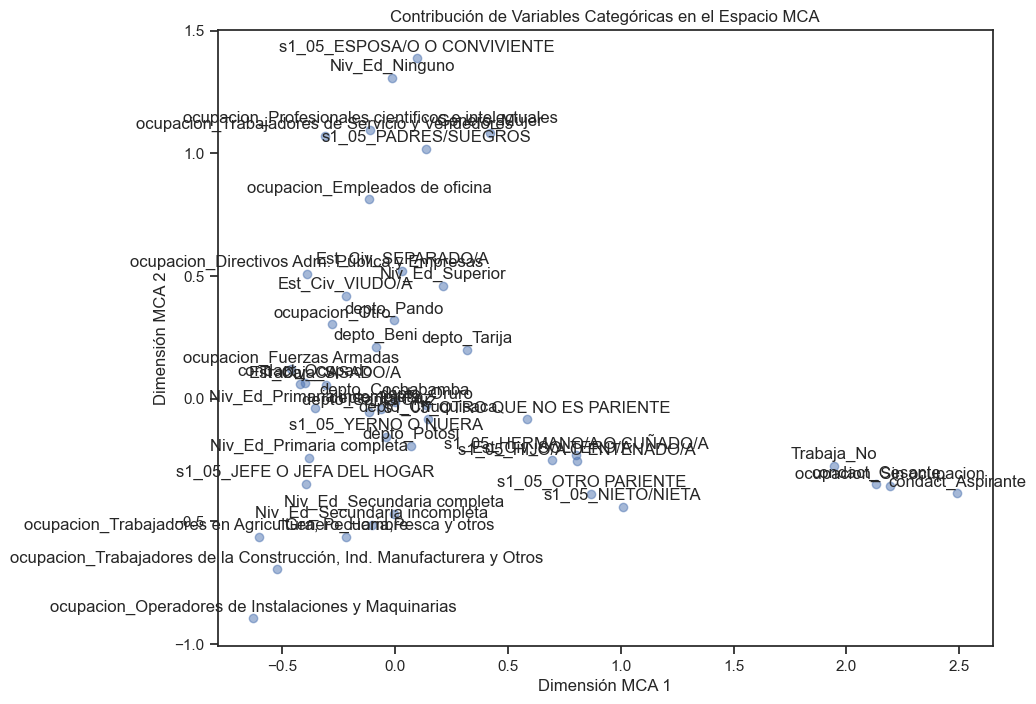

In [233]:
# Obtén las coordenadas de las categorías en las dimensiones MCA
category_coordinates = mca.column_coordinates(df_original[categorical_vars])

# Visualiza la contribución de las variables categóricas en el espacio MCA
plt.figure(figsize=(10, 8))
plt.scatter(category_coordinates.iloc[:, 0], category_coordinates.iloc[:, 1], alpha=0.5)
plt.title('Contribución de Variables Categóricas en el Espacio MCA')
plt.xlabel('Dimensión MCA 1')
plt.ylabel('Dimensión MCA 2')
for category, (x, y) in category_coordinates.iterrows():
    plt.annotate(category, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()


In [234]:
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, v_measure_score
from sklearn.preprocessing import LabelEncoder

# Codifica las etiquetas categóricas si es necesario
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(combined_data_imputed['cluster'])

# Inercia (menor es mejor)
inertia = kmeans.inertia_
print(f"Inercia: {inertia}")

# Puntuación de silueta (mayor es mejor)
silhouette_avg = silhouette_score(combined_data_imputed[cluster_columns], combined_data_imputed['cluster'])
print(f"Puntuación de silueta: {silhouette_avg}")

# Completitud, homogeneidad y puntuación V (mayor es mejor)
completeness = completeness_score(true_labels, combined_data_imputed['cluster'])
homogeneity = homogeneity_score(true_labels, combined_data_imputed['cluster'])
v_measure = v_measure_score(true_labels, combined_data_imputed['cluster'])

print(f"Completitud: {completeness}")
print(f"Homogeneidad: {homogeneity}")
print(f"Puntuación V: {v_measure}")


Inercia: 4405.986111198771
Puntuación de silueta: 0.5731358575908179
Completitud: 1.0
Homogeneidad: 1.0
Puntuación V: 1.0


In [235]:
import scipy.stats as stats

# Lista de variables categóricas
categorical_variables = ['depto', 'peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'Cont_Trab',
                          'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra', 'ingresos_categoria',
                          'tiempo_trab_categoria', 'phrs_categoria', 'Nacionalidad']

# Realizar la prueba de chi-cuadrado para cada variable
for variable in categorical_variables:
    # Verificar si la variable está presente en el DataFrame
    if variable in df_1.columns:
        # Obtener los datos
        data = df_1[variable]

        # Realizar la prueba de chi-cuadrado con corrección
        obs = data.value_counts().sort_values(ascending=False)  # Obtener las frecuencias observadas
        chi2, p, dof, expected = stats.chi2_contingency(obs + 0.5)

        # Imprimir los resultados
        print(f"Variable: {variable}")
        print(f"Estadístico de chi-cuadrado: {chi2}")
        print(f"Valor p: {p}")
        print("\n")
    else:
        print(f"La variable '{variable}' no está presente en el DataFrame.")


Variable: depto
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: peao
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Genero
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: s1_05
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Niv_Ed
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Est_Civ
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: ocupacion
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Trabaja
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Cont_Trab
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: condact
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Segundo_Trab
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Aporta_Hog
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: pagos_extra
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: ingresos_categoria
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: tiempo_trab_categoria
Estadístico de chi-cuadrad

In [236]:

columns_to_drop = ["Nacionalidad", 'Segundo_Trab', 'pagos_extra', 'ingresos', 'tiempo_trab_meses', 'phrs']
df_1 = df_1.drop(columns=columns_to_drop)


In [237]:
df_1.columns


Index(['gestion', 'trimestre', 'id_persona', 'depto', 'peao', 'Genero', 'Edad',
       's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'Cont_Trab',
       'condact', 'Aporta_Hog', 'tasa_desempleo', 'ingresos_categoria',
       'tiempo_trab_categoria', 'phrs_categoria'],
      dtype='object')

## Transformacion One hot encoding

In [238]:
import pandas as pd

categorical_columns = ['peao','depto', 'Genero', 'Cont_Trab', 's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'condact', 'Aporta_Hog', 'ingresos_categoria','tiempo_trab_categoria','phrs_categoria']
       

# Aplicar One-Hot Encoding a las variables categóricas
df_enc = pd.get_dummies(df_1, columns=categorical_columns, drop_first=True)

# Asegurarse de manejar correctamente las variables objetivo
X_enc = df_enc.drop('tasa_desempleo', axis=1)
y_enc = df_enc['tasa_desempleo']

# Continuar con el entrenamiento del modelo utilizando X_enc y y_enc

df_enc.head()

,gestion,trimestre,id_persona,Edad,tasa_desempleo,peao_Si,depto_Chuquisaca,depto_Cochabamba,depto_La Paz,depto_Oruro,...,Aporta_Hog_Si,ingresos_categoria_Bajo,ingresos_categoria_Medio,ingresos_categoria_Alto,tiempo_trab_categoria_Corto,tiempo_trab_categoria_Medio,tiempo_trab_categoria_Largo,phrs_categoria_Parcial,phrs_categoria_Completo,phrs_categoria_Extra
1,2016,1,212881,22.0,5.8,True,True,False,False,False,...,True,True,False,False,False,False,True,True,False,False
4,2016,1,212886,27.0,5.8,True,True,False,False,False,...,True,True,False,False,False,False,True,False,True,False
6,2016,1,212895,22.0,5.8,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2016,1,212917,27.0,5.8,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,2016,1,212943,21.0,5.8,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [239]:
# Guardar el DataFrame en un archivo CSV
df_enc.to_csv('df_1t_encoded.csv', index=False)
 # El parámetro index=False evita que se escriba el índice en el archivo.

In [240]:
dimensiones =df_enc.shape
# Imprimir el número de filas y columnas
print(f"Número de filas: {dimensiones[0]}")
print(f"Número de columnas: {dimensiones[1]}")

Número de filas: 38165
Número de columnas: 54
